# Carga de Modulos

In [ ]:
!pip install shap
!pip install factor-analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=4af577b4dcc380fe1d718684356c235d6dfa27355f84f8aff10a9bb188c9b562
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor-analyzer


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import ast
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA, PCA
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture as GMM
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.neighbors import NearestNeighbors
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import  KernelPCA
from scipy.spatial.distance import pdist, squareform
from scipy.stats import spearmanr

#Funciones Auxiliares

In [ ]:
def freq(df, var):

    if type(var) != list:
        var = [var]

    for v in var:
        aux = df[v].value_counts().to_frame().rename(columns = {"count":"FA"})
        aux["FR"] = aux["FA"]/sum(aux["FA"])
        aux["FAA"] = aux["FA"].cumsum()
        aux["FRA"] = aux["FR"].cumsum()
        print(f"Frecuencias para la variable {v} \n" )
        display(aux)
        plt.show()
        print("\n")

In [ ]:
def distance_correlation(df_original, df_reduced):
    orig_dist = squareform(pdist(df_original, metric='euclidean'))
    reduced_dist = squareform(pdist(df_reduced, metric='euclidean'))
    return spearmanr(orig_dist.ravel(), reduced_dist.ravel()).correlation

# Lectura de datos

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PROYECTO DIMPLADO/credit_card_transactions.csv')

In [ ]:
df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [ ]:
df.shape

(1296675, 24)

In [ ]:
df = df.drop(columns=['Unnamed: 0'], axis=1)

In [ ]:
df.shape

(1296675, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

#Limpieza de Datos

In [ ]:
df.isnull().sum()

,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0
city,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Vemos los valores unicos de cada columna
for col in df.columns:
    print(f"Columna: {col}")
    print(df[col].unique())
    print("\n")

Columna: trans_date_trans_time
['2019-01-01 00:00:18' '2019-01-01 00:00:44' '2019-01-01 00:00:51' ...
 '2020-06-21 12:12:32' '2020-06-21 12:13:36' '2020-06-21 12:13:37']


Columna: cc_num
[   2703186189652095        630423337322      38859492057661
    3534093764340240     375534208663984    4767265376804500
      30074693890476    6011360759745864    4922710831011201
    2720830304681674       4642894980163     377234009633447
     180042946491150    5559857416065248    3514865930894695
    6011999606625827    6011860238257910    3565423334076143
    2348245054386329 4956828990005111019 4469777115158234880
    2305336922781618     180048185037117        630441765090
 4428780983793657331     343464013864032     374930071163758
    4334230547694630 4225990116481262579    4260059589824237
     180094608895855 4599735407877245080        630412733309
    2712209726293386     374125201044065     349612764943496
    3598215285024754     213141712584544      30561214688470
    478991162517972

In [ ]:
df_nulos_merch_zipcode = df[df['merch_zipcode'].isnull()]
df_nulos_merch_zipcode

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,...,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,NaN
13,2019-01-01 00:07:27,5559857416065248,fraud_Kiehn Inc,grocery_pos,96.29,Jack,Hill,M,5916 Susan Bridge Apt. 939,Grenada,...,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,1325376447,41.657520,-122.230347,0,NaN
14,2019-01-01 00:09:03,3514865930894695,fraud_Beier-Hyatt,shopping_pos,7.77,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,1325376543,32.863258,-106.520205,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296631,2020-06-21 11:53:11,4430881574719618,"fraud_Christiansen, Goyette and Schamberger",gas_transport,47.93,Alicia,Morales,F,4456 Dunn Roads,Meredith,...,-106.6596,61,Public relations account executive,1939-11-04,61c98cca889eb14ac300b2d445a95dd9,1371815591,39.905409,-107.183150,0,NaN
1296636,2020-06-21 11:55:56,3534330126107879,"fraud_Lockman, West and Runte",grocery_pos,98.98,Jeffrey,Smith,M,713 Scott Pike Apt. 712,Bridger,...,-108.9082,1446,Chartered loss adjuster,1978-01-15,e064f1755c6491e6196a8798d3cd4c4c,1371815756,45.255121,-108.965818,0,NaN
1296639,2020-06-21 11:57:21,4449530933957323,"fraud_Mosciski, Gislason and Mertz",grocery_pos,135.51,Felicia,Mckee,F,84079 Thomas Burgs,Tomales,...,-122.9145,337,Occupational psychologist,1954-07-05,2f518db072a442edd69b6d9880b2b390,1371815841,38.987178,-123.901733,0,NaN
1296646,2020-06-21 12:02:13,5359543825610251,fraud_Graham and Sons,health_fitness,110.32,Michael,Francis,M,1833 Jeanette Stravenue,Belgrade,...,-111.1439,18182,"Engineer, drilling",1975-06-29,47cf62dfb17e95973f634a2d269c7cb6,1371816133,44.875069,-111.290110,0,NaN


In [ ]:
valor_merchant = 'fraud_Heller, Gutmann and Zieme'
columnas_a_mostrar = ['merchant', 'merch_zipcode', 'zip', 'first', 'last']
df_filtrado = df[df['merchant'] == valor_merchant][columnas_a_mostrar]
df_filtrado

,merchant,merch_zipcode,zip,first,last
1,"fraud_Heller, Gutmann and Zieme",NaN,99160,Stephanie,Gill
31,"fraud_Heller, Gutmann and Zieme",63879.0,38079,Mary,Myers
325,"fraud_Heller, Gutmann and Zieme",NaN,92648,Melissa,Flores
326,"fraud_Heller, Gutmann and Zieme",67762.0,67851,Kelsey,Richards
481,"fraud_Heller, Gutmann and Zieme",59635.0,59714,Michael,Francis
...,...,...,...,...,...
1293834,"fraud_Heller, Gutmann and Zieme",30434.0,31042,Lance,Wagner
1295516,"fraud_Heller, Gutmann and Zieme",NaN,53129,Margaret,Ray
1295835,"fraud_Heller, Gutmann and Zieme",29138.0,29817,Casey,Howell
1295951,"fraud_Heller, Gutmann and Zieme",38619.0,38922,Justin,Fowler


In [ ]:
df_nulos_merch_zipcode[['merchant', 'merch_long', 'merch_lat', 'merch_zipcode']]

,merchant,merch_long,merch_lat,merch_zipcode
1,"fraud_Heller, Gutmann and Zieme",-118.186462,49.159047,NaN
3,"fraud_Kutch, Hermiston and Farrell",-112.561071,47.034331,NaN
6,fraud_Rowe-Vandervort,-100.153370,37.162705,NaN
13,fraud_Kiehn Inc,-122.230347,41.657520,NaN
14,fraud_Beier-Hyatt,-106.520205,32.863258,NaN
...,...,...,...,...
1296631,"fraud_Christiansen, Goyette and Schamberger",-107.183150,39.905409,NaN
1296636,"fraud_Lockman, West and Runte",-108.965818,45.255121,NaN
1296639,"fraud_Mosciski, Gislason and Mertz",-123.901733,38.987178,NaN
1296646,fraud_Graham and Sons,-111.290110,44.875069,NaN


dado que el codigo postal del comercio es diferente al codigo postal del titular en ocaciones puede estar lejos o cerca por lo que lo mejor sera agrupar por comercio y tomar codigo postal mas fecuente

In [ ]:
# Imputamos los valores nulos de 'merch_zipcode' basándonos en merchant
# es decir tomamos el código postal más frecuente para cada comercio
df['merch_zipcode'] = df.groupby('merchant')['merch_zipcode'].transform(
    lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x
)

Cambiamos el tipo de datos de las variables fechas

In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

Agregamos nuevas variables con ayudas de las existentes, dado que ya se trataron los valores nulos

In [ ]:
#Extraemos la fecha y hora en que se realizo la transacción
df['Fecha'] = df['trans_date_trans_time'].dt.date
df['Hora'] = df['trans_date_trans_time'].dt.time

In [ ]:
#Calculamos la edad que tuvo en el momento de la transacción tomando el año de job y el año de la transación que son 2019 y 2020 xd
df['year_cumple'] = df['dob'].dt.year
df['year_transaccion'] = df['trans_date_trans_time'].dt.year

df['age'] = (df['year_transaccion'] - df['year_cumple']).astype('int64')

In [ ]:
# Crear una columna que combine 'first' y 'last' para identificar al titular por su nombre
df['name'] = df['first'] + ' ' + df['last']

In [ ]:
# Contar el número de transacciones por titular
df['transaction_count'] = df.groupby('name')['trans_num'].transform('count')
# Sumar el monto de transacciones por titular para determinar su gasto
df['gasto_total'] = df.groupby('name')['amt'].transform('sum')
#Obtener el promedio de gastos cob amt
df['amt_prom'] = df.groupby('name')['amt'].transform('mean')

Eliminamos variables innecesarias y aquellas que obtuvimos sus componentes como nuevas columnas.

In [ ]:
df = df.drop(columns=['trans_date_trans_time', 'dob', 'year_cumple', 'year_transaccion', 'first', 'last', 'trans_num', 'unix_time', 'cc_num', 'amt'])

In [ ]:
df.isnull().sum()

,0
merchant,0
category,0
gender,0
street,0
city,0
state,0
zip,0
lat,0
long,0
city_pop,0


***Como es un caso de clasificación para proponer nuevos beneficios debemos clasificar a cada cliente, por lo que haremos la agrupación por persona***

In [ ]:
df['name'].value_counts()

,count
name,
Scott Martin,4618
Jeffrey Smith,3592
Barbara Taylor,3123
Monica Cohen,3123
Jessica Perez,3119
...,...
Cody Blake,7
Angelica Lopez,7
Samantha Ramirez,7


**Variables Continuas**
1. `gasto_total` (Suma de Monto de la transacción) se toma el primer registro por naturaleza de como se creo esa variable

11. `amt_prom` (Promedio de montos transacciones) se toma el primer registro por naturaleza de como se creo esa variable

2. `lat`, `long` (Coordenadas del titular) usamo la `mode`
   - Si la ubicación del usuario varía, el promedio puede representar su posición más frecuente.

3. `city_pop` (Población de la ciudad donde ocurrio la transacción) usamos la `mode`
   - Se toma el valor de la población donde realiza la mayoría de sus transacciones el titular.

4. `merch_lat`, `merch_long` (Coordenadas del comercio) usamos la `mode`
   - Para conocer la ubicación de los comercios más visitados.

5. `transaction_count` (Número de transacciones) se toma el primer registro por naturaleza de la variable

6. `age` (Edad del titular) se usa la `mode`
   - La edad en que la persona realizo más transacciones es importante

**Variables Categóricas**
7. `street` (Dirección) usamos la `mode`
   - Asumiendo que es la dirección principal del usuario.

8. `city` (Ciudad del titular) usamos la `mode`
   - Para obtener la ciudad más frecuente en las transacciones.

9. `merchant` (Comerciante o tienda) usamos la `mode`
   - Para conocer el comercio más visitado.

10. `state` (Estado de residencia) se usa la `mode`
    - Se mantiene el estado más frecuente.

11. `job` (Ocupación) iguaal la `mode`
    - Se mantiene la ocupación más frecuente.

12. `category` (Tipo de transacción) `mode`
    - Para conocer la categoría de gasto más común.

13. `gender` (Género) `mode`
    - Se mantiene el más frecuente, por si llegase a haber un error del titular

14. `zip` (Código postal del titular) usamos la `mode`
    - Se asume que el titular tiene un código postal principal.

15. `is_fraud` (Indicador de fraude) usamos la moda
    - Si tiene mas o menos transacciones fraudulentas se tomaran medidas

16. `merch_zipcode`, `merch_lat`, `merch_long` (Código postal del comercio y cordenadas del comercio) `mode`
    - Para conocer el código postal y las cordenadas del comercio más frecuente.

17. `Fecha` (Fecha en la que hizo mas transacciones) `mode`

18. `Hora` (Hora en la que realizo más transacciones) `mode`

In [ ]:
df[df['name']== 'Aaron Murray']

,merchant,category,gender,street,city,state,zip,lat,long,city_pop,...,merch_long,is_fraud,merch_zipcode,Fecha,Hora,age,name,transaction_count,gasto_total,amt_prom
84,fraud_Wolf Inc,grocery_pos,M,624 Hale Springs Apt. 572,Meadville,MO,64659,39.7795,-93.3014,964,...,-92.821257,0,52544.0,2019-01-01,01:02:16,45,Aaron Murray,2050,204477.6,99.745171
589,fraud_Harris Inc,gas_transport,M,624 Hale Springs Apt. 572,Meadville,MO,64659,39.7795,-93.3014,964,...,-94.219522,0,64080.0,2019-01-01,07:39:00,45,Aaron Murray,2050,204477.6,99.745171
954,fraud_Schimmel-Olson,kids_pets,M,624 Hale Springs Apt. 572,Meadville,MO,64659,39.7795,-93.3014,964,...,-93.033773,0,65349.0,2019-01-01,12:04:54,45,Aaron Murray,2050,204477.6,99.745171
1070,fraud_Kub-Heaney,health_fitness,M,624 Hale Springs Apt. 572,Meadville,MO,64659,39.7795,-93.3014,964,...,-93.539051,0,50103.0,2019-01-01,13:14:46,45,Aaron Murray,2050,204477.6,99.745171
1715,fraud_Kessler Inc,travel,M,624 Hale Springs Apt. 572,Meadville,MO,64659,39.7795,-93.3014,964,...,-92.400368,0,65247.0,2019-01-01,18:14:30,45,Aaron Murray,2050,204477.6,99.745171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293266,fraud_Denesik and Sons,shopping_pos,M,624 Hale Springs Apt. 572,Meadville,MO,64659,39.7795,-93.3014,964,...,-92.762833,0,65281.0,2020-06-20,03:59:21,46,Aaron Murray,2050,204477.6,99.745171
1293549,"fraud_Labadie, Treutel and Bode",shopping_net,M,624 Hale Springs Apt. 572,Meadville,MO,64659,39.7795,-93.3014,964,...,-93.321624,0,50060.0,2020-06-20,07:47:55,46,Aaron Murray,2050,204477.6,99.745171
1295934,"fraud_Bernier, Volkman and Hoeger",misc_net,M,624 Hale Springs Apt. 572,Meadville,MO,64659,39.7795,-93.3014,964,...,-93.376187,0,64643.0,2020-06-21,05:44:40,46,Aaron Murray,2050,204477.6,99.745171
1295987,fraud_Mohr-Bayer,shopping_net,M,624 Hale Springs Apt. 572,Meadville,MO,64659,39.7795,-93.3014,964,...,-94.163470,0,64471.0,2020-06-21,06:09:11,46,Aaron Murray,2050,204477.6,99.745171


In [ ]:
#Realizamos el proceso de agrupación, usando la moda
agg_funcs = {
    'gasto_total': 'first',
    'amt_prom': 'first',
    'lat': lambda x: x.mode()[0] if not x.mode().empty else None,
    'long': lambda x: x.mode()[0] if not x.mode().empty else None,
    'city_pop': lambda x: x.mode()[0] if not x.mode().empty else None,
    'transaction_count': 'first',
    'age': lambda x: x.mode()[0] if not x.mode().empty else None,
    'street': lambda x: x.mode()[0] if not x.mode().empty else None,
    'city': lambda x: x.mode()[0] if not x.mode().empty else None,
    'merchant': lambda x: x.mode()[0] if not x.mode().empty else None,
    'state': lambda x: x.mode()[0] if not x.mode().empty else None,
    'job': lambda x: x.mode()[0] if not x.mode().empty else None,
    'category': lambda x: x.mode()[0] if not x.mode().empty else None,
    'gender': lambda x: x.mode()[0] if not x.mode().empty else None,
    'zip': lambda x: x.mode()[0] if not x.mode().empty else None,
    'Fecha': lambda x: x.mode()[0] if not x.mode().empty else None,
    'Hora': lambda x: x.mode()[0] if not x.mode().empty else None,
    'is_fraud': lambda x: x.mode()[0] if not x.mode().empty else None,
    'merch_zipcode': lambda x: x.mode()[0] if not x.mode().empty else None,
    'merch_lat': lambda x: x.mode()[0] if not x.mode().empty else None,
    'merch_long': lambda x: x.mode()[0] if not x.mode().empty else None
}

# Agrupar por 'name' y aplicar las funciones de agregación
df = df.groupby('name').agg(agg_funcs)
df.columns = ['gasto_total', 'amt_prom', 'lat', 'long', 'city_pop', 'transaction_count', 'age', 'street', 'city', 'merchant', 'state', 'job', 'category', 'gender', 'zip', 'Fecha', 'Hora', 'is_fraud', 'merch_zipcode', 'merch_lat', 'merch_long']

In [ ]:
df

,gasto_total,amt_prom,lat,long,city_pop,transaction_count,age,street,city,merchant,...,job,category,gender,zip,Fecha,Hora,is_fraud,merch_zipcode,merch_lat,merch_long
name,,,,,,,,,,,,,,,,,,,,,
Aaron Murray,204477.60,99.745171,39.7795,-93.3014,964,2050,45,624 Hale Springs Apt. 572,Meadville,"fraud_Osinski, Ledner and Leuschke",...,Tourist information centre manager,home,M,64659,2019-12-21,01:09:34,0,65339.0,39.174043,-94.219522
Aaron Pena,97973.69,66.377839,38.7894,-77.2818,43102,1476,69,793 Hooper Tunnel Suite 154,Burke,fraud_Bode-Rempel,...,Health visitor,kids_pets,M,22015,2019-05-06,00:28:39,0,23117.0,37.789455,-78.280343
Aaron Rogers,38418.91,75.627776,42.8062,-100.6215,4005,508,74,969 Huerta Path Apt. 270,Valentine,fraud_Huels-Hahn,...,Network engineer,gas_transport,M,69201,2019-09-07,00:09:30,0,69166.0,41.807044,-101.618899
Aaron Stewart,28704.06,53.452626,44.3229,-69.9576,6025,537,24,400 Zuniga Pine,Winthrop,fraud_Cartwright-Harris,...,Advertising account planner,home,M,4364,2020-01-15,00:01:32,0,4970.0,43.323929,-70.951385
Adam Keller,33310.58,63.935854,32.2844,-86.9920,800,521,87,32600 Cobb Curve,Sardis,"fraud_Lockman, West and Runte",...,Learning disability nurse,gas_transport,M,36775,2019-04-12,00:02:25,0,36726.0,31.284435,-87.985770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
William Thompson,133746.90,65.178801,41.4575,-74.1659,2258,2052,82,977 Rita Grove Apt. 000,Rock Tavern,"fraud_Schaefer, Maggio and Daugherty",...,Building surveyor,gas_transport,M,12575,2019-12-02,00:45:33,0,12725.0,40.459589,-75.165690
Willie Jordan,63010.83,60.704075,32.9550,-92.5870,1758,1038,62,529 West Key,Spearsville,fraud_Bernhard Inc,...,"Psychologist, forensic",gas_transport,M,71277,2019-12-01,00:40:14,0,71635.0,31.959292,-93.586957
Xavier Beltran,151215.59,99.746431,37.1046,-83.5706,467,1516,35,61107 Edwards Dam Apt. 463,Big Creek,fraud_Auer-Mosciski,...,"Psychologist, forensic",home,M,40914,2019-12-13,02:28:53,0,42634.0,36.105099,-84.568029


In [ ]:
df = df.reset_index()

# EDA

In [ ]:
# Gráfico de transacciones por categoría
fig1 = px.bar(df, x=df['category'].value_counts().index, y=df['category'].value_counts().values,
              labels={'x': 'Categoría', 'y': 'Número de Transacciones'},
              title="Transacciones por Categoría", color=df['category'].value_counts().index)
fig1.show()

In [ ]:
# Top 10 de personas con más transacciones
top_personas = df.groupby('name')['transaction_count'].sum().nlargest(10).reset_index()
fig2 = px.bar(top_personas, x='name', y='transaction_count',
              labels={'name': 'Titular de Tarjeta', 'transaction_count': 'Número de Transacciones'},
              title="👤 Top 10 Personas con más Transacciones",
              color='name')
fig2.show()

In [ ]:
# Gráfico de transacciones por comercio
top_merchants = df['merchant'].value_counts().head(10)
fig3 = px.bar(x=top_merchants.index, y=top_merchants.values,
              labels={'x': 'Comercio', 'y': 'Número de Transacciones'},
              title="🏪 Top 10 Comercios con más Transacciones", color=top_merchants.index)
fig3.show()

In [ ]:
#Estados con mayor actividad
fig = px.histogram(df, x='state', nbins=20, title='State Distribution')
fig.show()

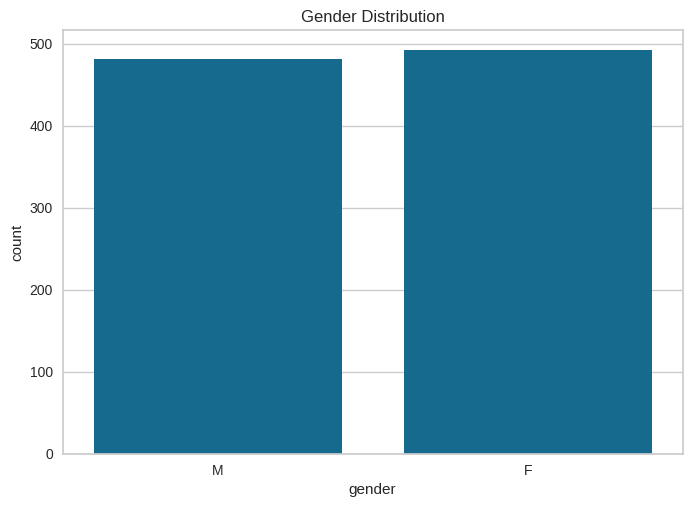

In [ ]:
#Genero que predomina en las transacciones
sns.countplot(data=df , x='gender')
plt.title('Gender Distribution')
plt.show()

In [ ]:
#Distribución por edad
fig = px.histogram(df, x='age', nbins=20, title='Edad Distribution')
fig.show()

In [ ]:
fig = px.scatter_mapbox(df,
                        lat='merch_lat',
                        lon='merch_long',
                        color=df['merchant'].value_counts()[df['merchant']].values,
                        size=df['merchant'].value_counts()[df['merchant']].values,
                        hover_name="merchant",
                        hover_data={"merch_lat": True, "merch_long": True, "transaction_count": True},
                        title="📍 Ubicación de Transacciones por Comercio",
                        color_continuous_scale="Viridis",
                        zoom=3,
                        height=600)
fig.update_layout(mapbox_style="open-street-map", mapbox_center={"lat": df["merch_lat"].mean(), "lon": df["merch_long"].mean()})
fig.show()

In [ ]:
#Gráfico de transacciones por fecha
transacciones_por_fecha = df['Fecha'].value_counts().reset_index()
transacciones_por_fecha.columns = ['Fecha', 'Cantidad']
transacciones_por_fecha = transacciones_por_fecha.sort_values('Fecha')

fig_fecha = px.line(transacciones_por_fecha, x='Fecha', y='Cantidad',
                    title="📅 Transacciones por Fecha",
                    labels={'Fecha': 'Fecha', 'Cantidad': 'Número de Transacciones'},
                    markers=True)

fig_fecha.show()

##Ingenieria de Variables

In [ ]:
#df = df.set_index('name')

Vamos a clasificar las variables para tratar los datos atipicos


In [ ]:
df.dtypes

,0
name,object
gasto_total,float64
amt_prom,float64
lat,float64
long,float64
city_pop,int64
transaction_count,int64
age,int64
street,object
city,object


In [ ]:
#clasificación de variables en continuas y discretas
varc = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
vard = df.select_dtypes(include=['object']).columns.tolist()

### Continuas

In [ ]:
varc

['gasto_total',
 'amt_prom',
 'lat',
 'long',
 'city_pop',
 'transaction_count',
 'age',
 'zip',
 'is_fraud',
 'merch_zipcode',
 'merch_lat',
 'merch_long']

####Outliers

array([[<Axes: title={'center': 'gasto_total'}>,
        <Axes: title={'center': 'amt_prom'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'city_pop'}>,
        <Axes: title={'center': 'transaction_count'}>],
       [<Axes: title={'center': 'age'}>, <Axes: title={'center': 'zip'}>,
        <Axes: title={'center': 'is_fraud'}>],
       [<Axes: title={'center': 'merch_zipcode'}>,
        <Axes: title={'center': 'merch_lat'}>,
        <Axes: title={'center': 'merch_long'}>]], dtype=object)

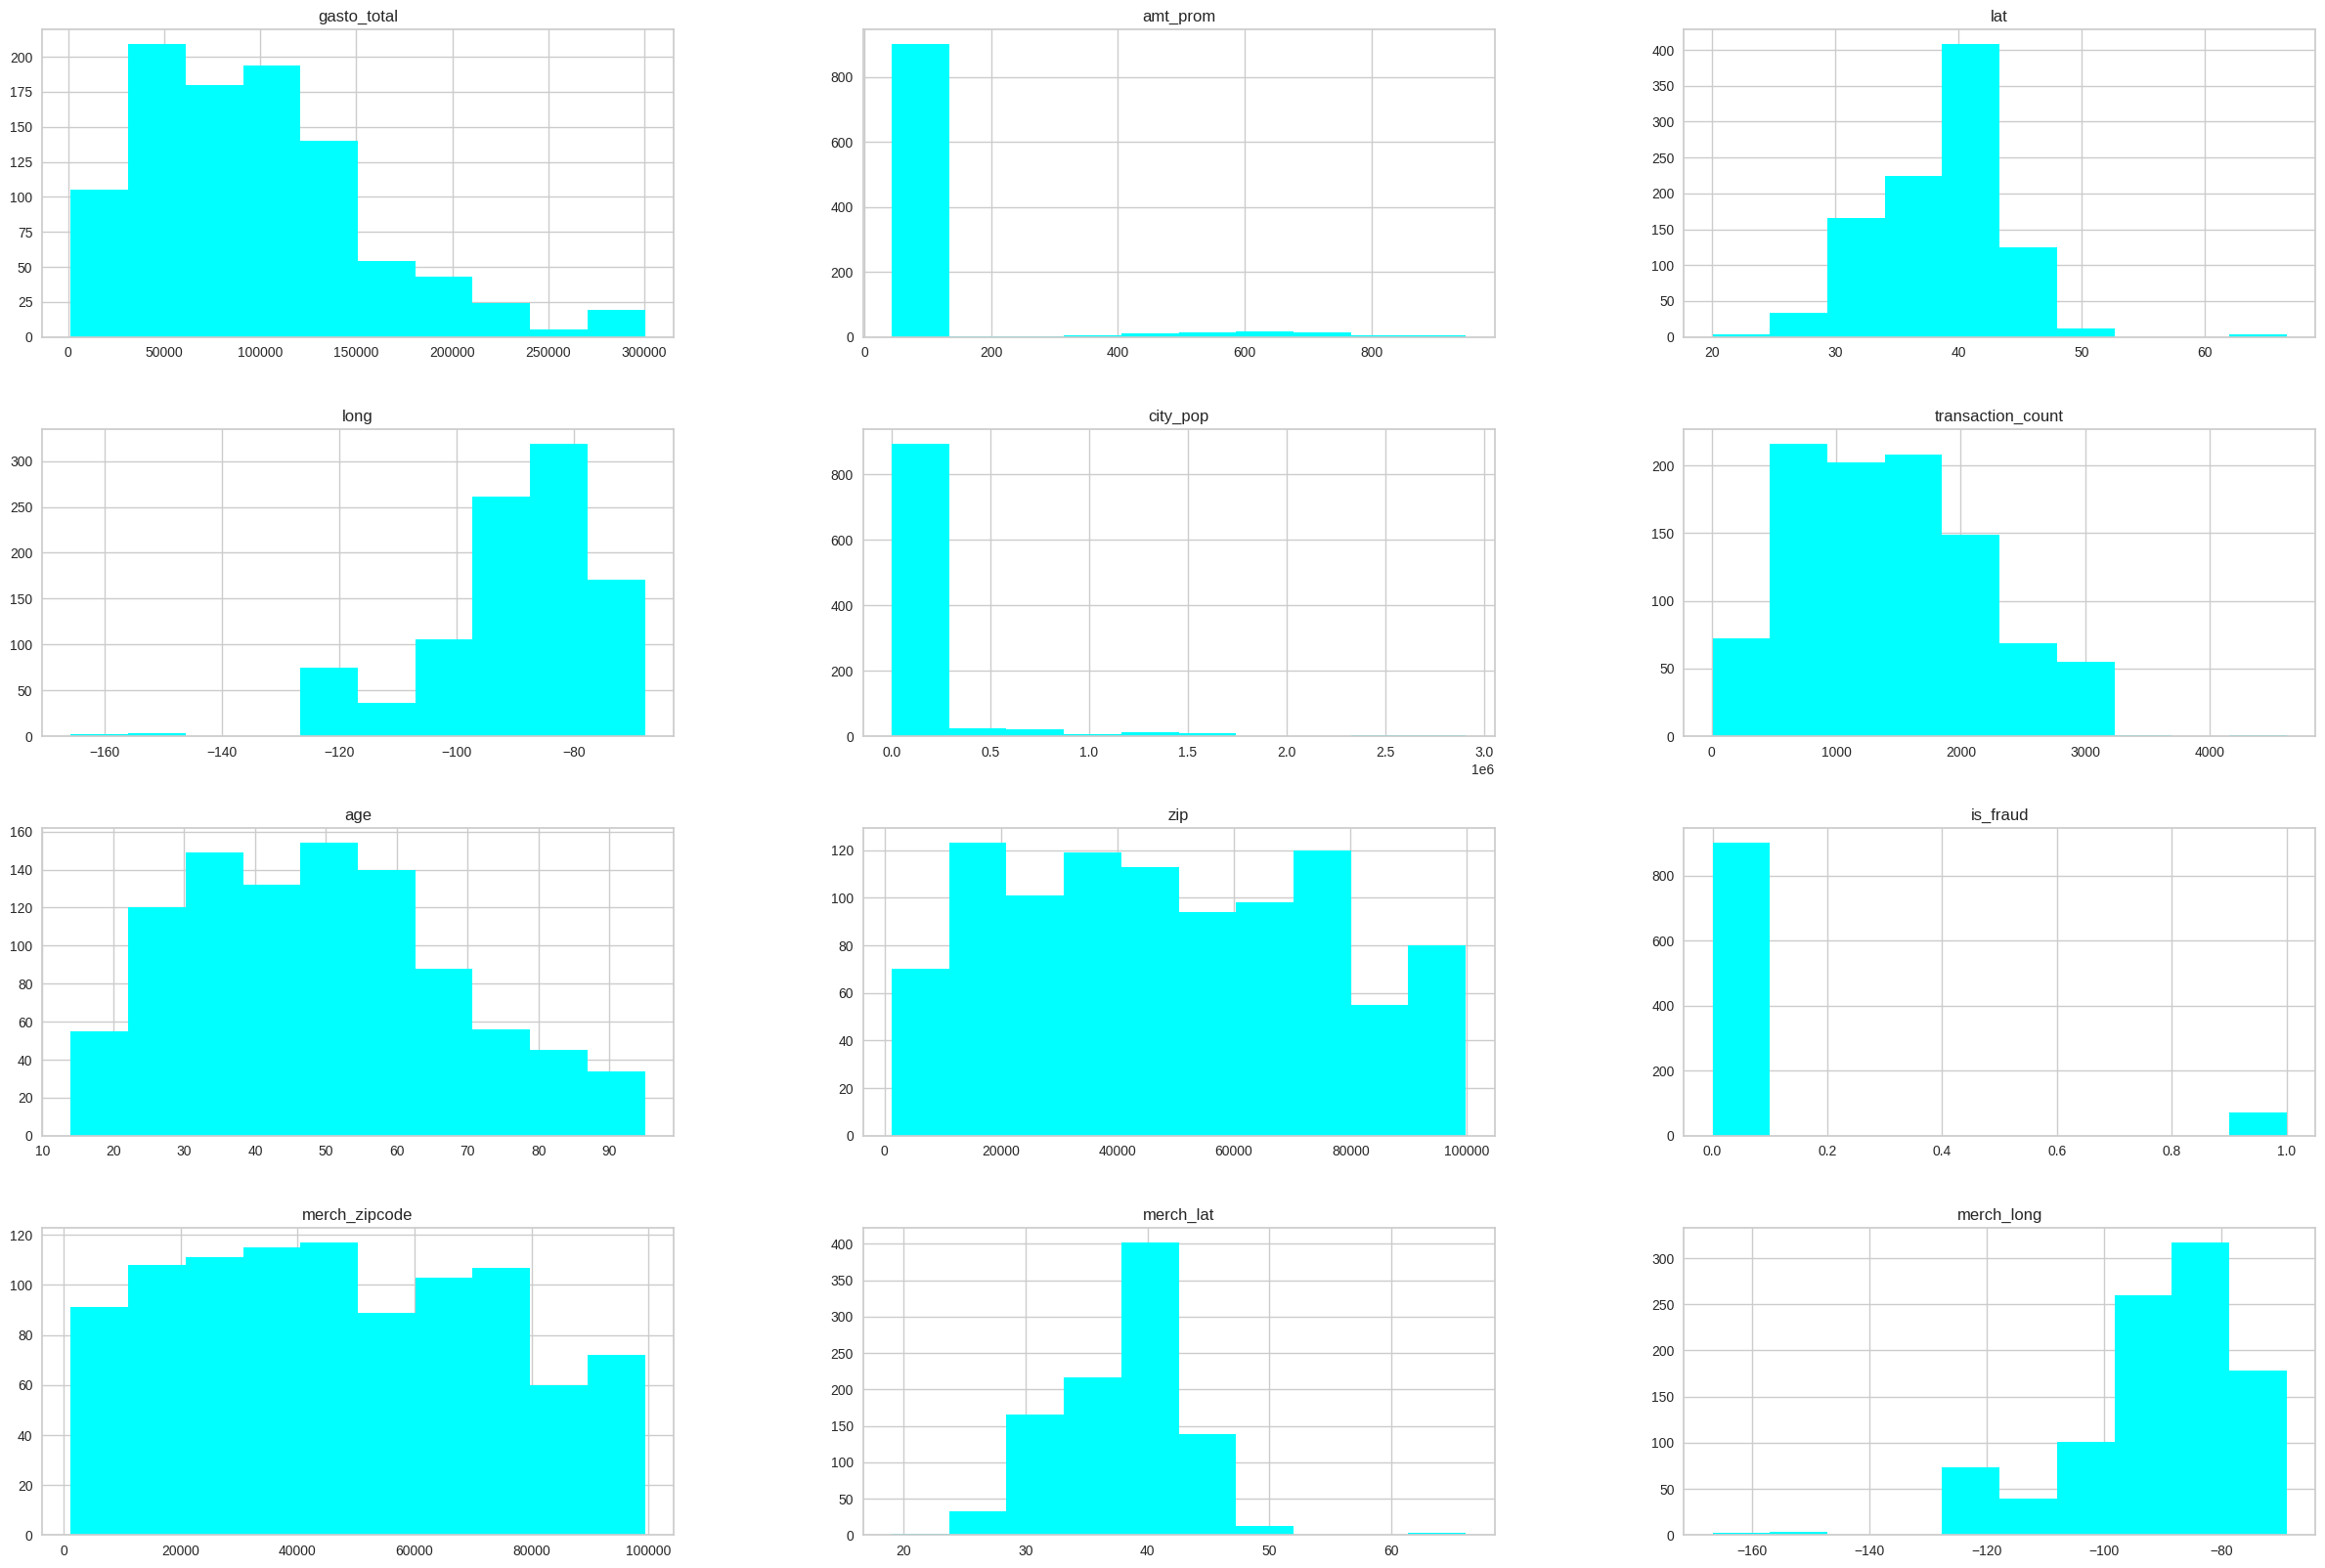

In [ ]:
df[varc].hist(figsize=(30,20), color='cyan')

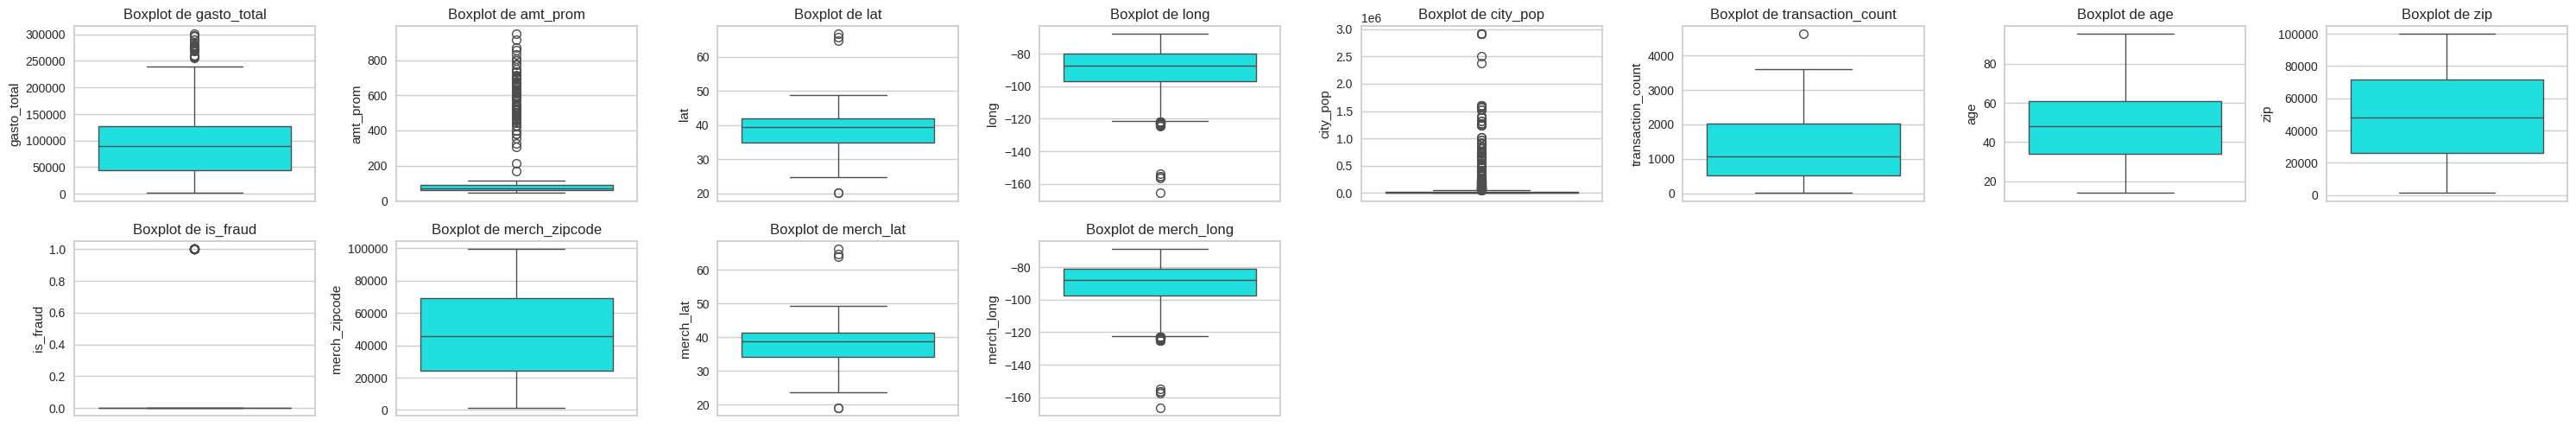

In [ ]:
plt.figure(figsize=(30, 20))
for i, col in enumerate(varc, 1):
    plt.subplot(8, 8, i)
    sns.boxplot(y=df[col], color='cyan')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

Vamos a excluir las siguientes variables pues no tiene sentido tratar sus datos atipicos
+ 'lat', 'long' → Son coordenadas geográficas. No hay "outliers" porque cada punto tiene un significado real.
+ 'zip', 'merch_zipcode' → Son códigos postales. Aunque haya valores altos o bajos, no significa que sean incorrectos.
+ 'is_fraud' → Variable categórica binaria (0 o 1). No aplica detección de outliers.
+ 'merch_lat', 'merch_long' → Coordenadas del comercio. No hay razón para modificarlas.



In [ ]:
excluir = ['lat','long','zip','is_fraud','merch_zipcode','merch_lat','merch_long']
# Filtrar las variables continuas a tratar
varc_filtradas = [col for col in varc if col not in excluir]
# Aplicar IQR para tratar outliers
for col in varc_filtradas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df[col] = df[col].apply(lambda x: limite_inferior if x < limite_inferior else (limite_superior if x > limite_superior else x))

array([[<Axes: title={'center': 'gasto_total'}>,
        <Axes: title={'center': 'amt_prom'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'city_pop'}>,
        <Axes: title={'center': 'transaction_count'}>],
       [<Axes: title={'center': 'age'}>, <Axes: title={'center': 'zip'}>,
        <Axes: title={'center': 'is_fraud'}>],
       [<Axes: title={'center': 'merch_zipcode'}>,
        <Axes: title={'center': 'merch_lat'}>,
        <Axes: title={'center': 'merch_long'}>]], dtype=object)

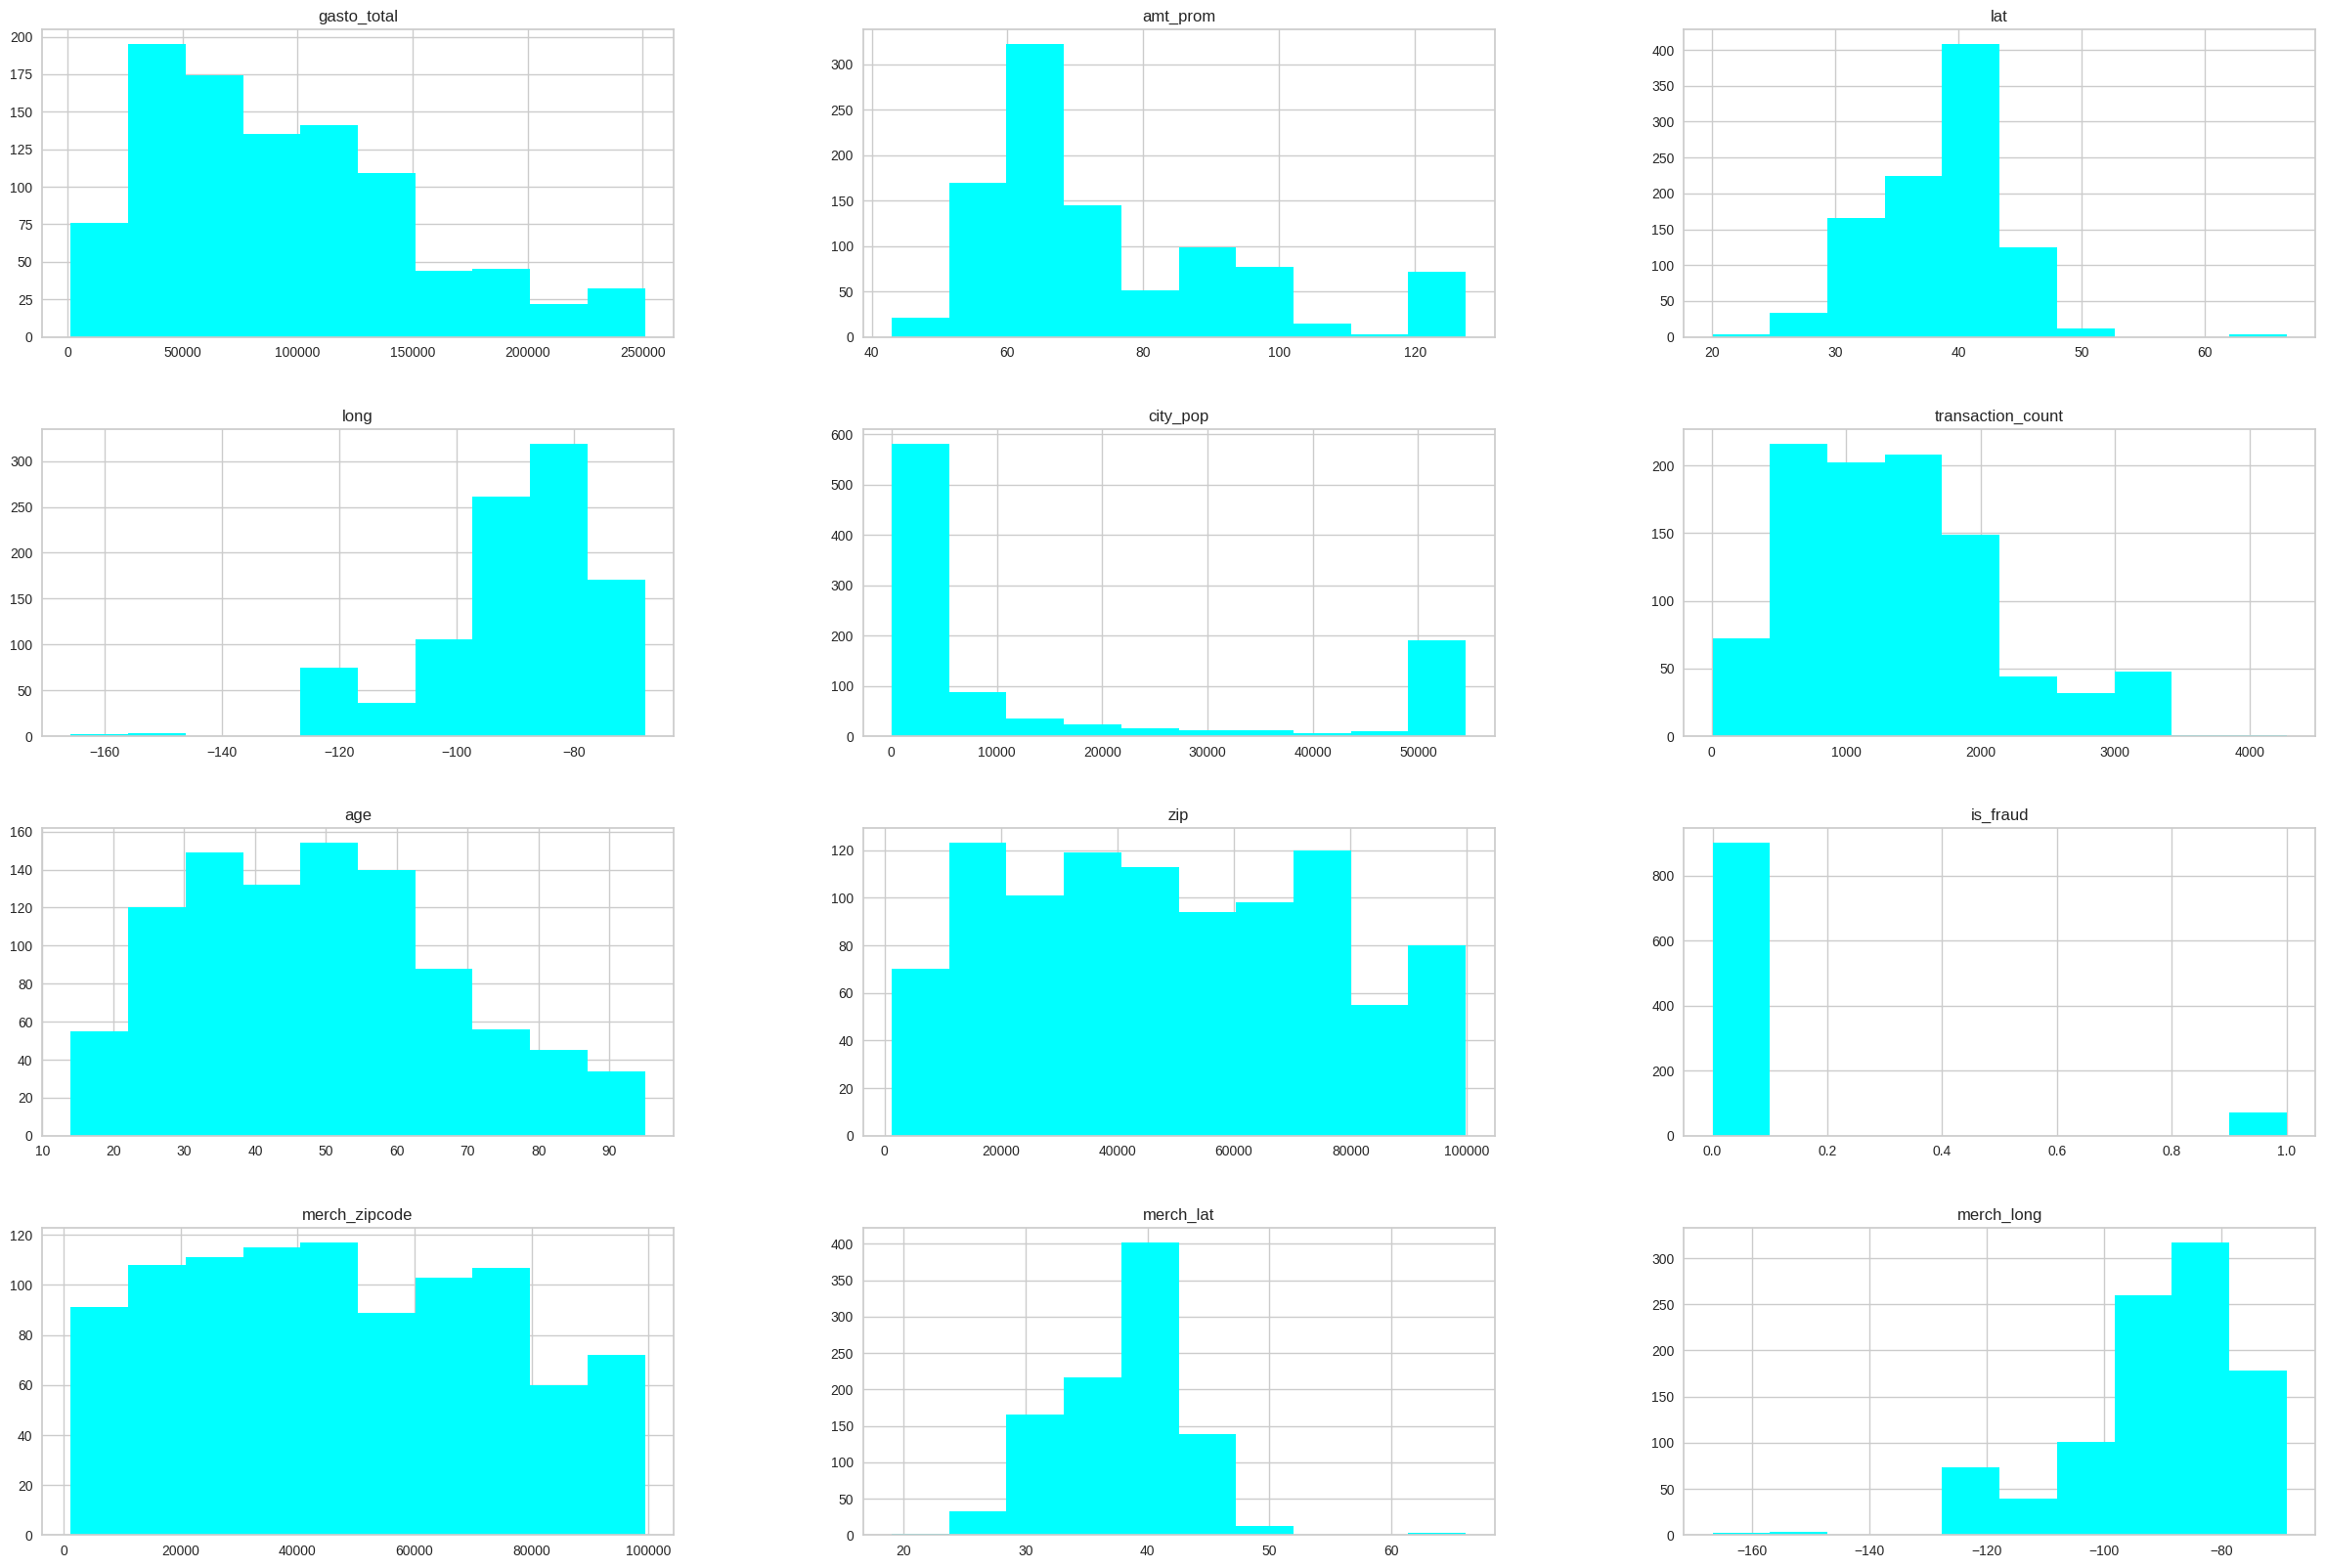

In [ ]:
df[varc].hist(figsize=(30,20), color='cyan')

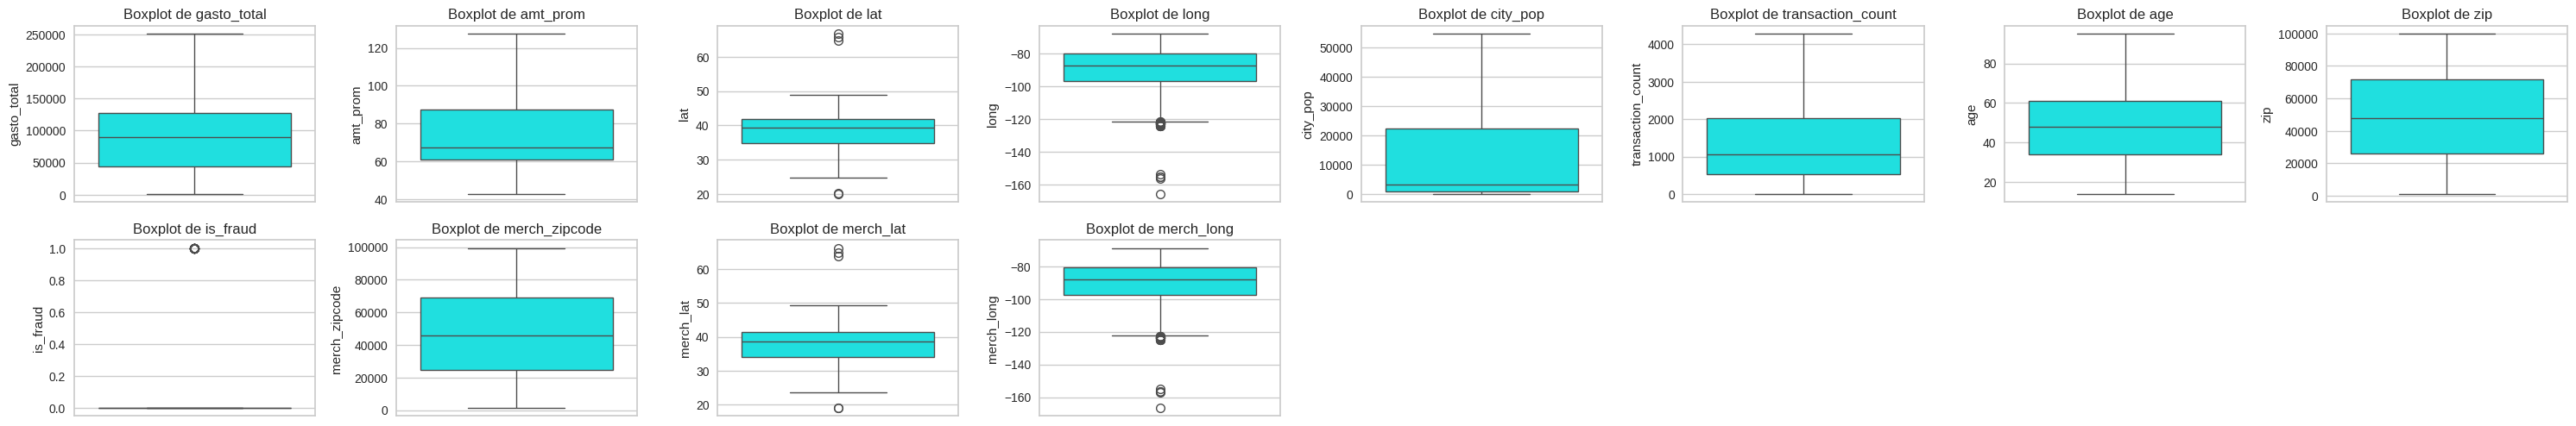

In [ ]:
plt.figure(figsize=(30, 20))
for i, col in enumerate(varc, 1):
    plt.subplot(8, 8, i)
    sns.boxplot(y=df[col], color='cyan')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

#### Correlación

<function matplotlib.pyplot.show(close=None, block=None)>

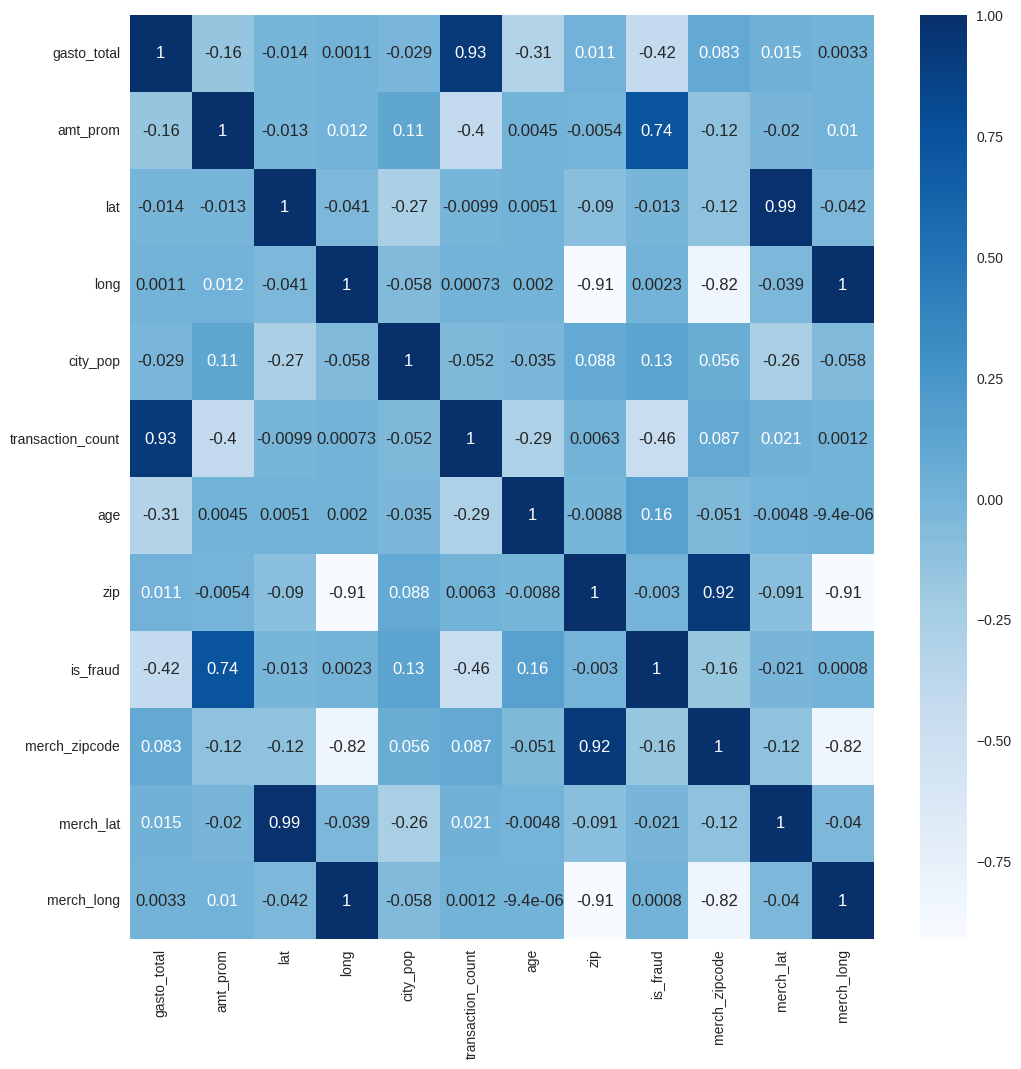

In [ ]:
#Verificamos la correlación para eliminar variables altamente correlacionadas
corr_matrix = df[varc].corr()
plt.figure(figsize=(len(varc), len(varc)))
sns.heatmap(corr_matrix, cmap="Blues", annot=True)
plt.show

In [ ]:
#ver que variables estan altamente correlacionadas
high_corr_vars = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            high_corr_vars.append((colname_i, colname_j))

print("Variables con correlación mayor a 0.7 o menor a -0.7:")
for var in high_corr_vars:
    print(f"{var[0]} - {var[1]}")

Variables con correlación mayor a 0.7 o menor a -0.7:
gasto_total - transaction_count
amt_prom - is_fraud
lat - merch_lat
long - zip
long - merch_zipcode
long - merch_long
zip - merch_zipcode
zip - merch_long
merch_zipcode - merch_long


In [ ]:
# eliminamos las variables correlacionadas que se obtuvieron
variables_a_eliminar = ['gasto_total', 'merch_zipcode', 'lat', 'zip', 'merch_long']
df = df.drop(columns=variables_a_eliminar, errors='ignore')
varc = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
varc

['amt_prom',
 'long',
 'city_pop',
 'transaction_count',
 'age',
 'is_fraud',
 'merch_lat']

No eliminamos amt_prom o is_fraud puesto que su correlación esde 0.74 (no muy alta)

<function matplotlib.pyplot.show(close=None, block=None)>

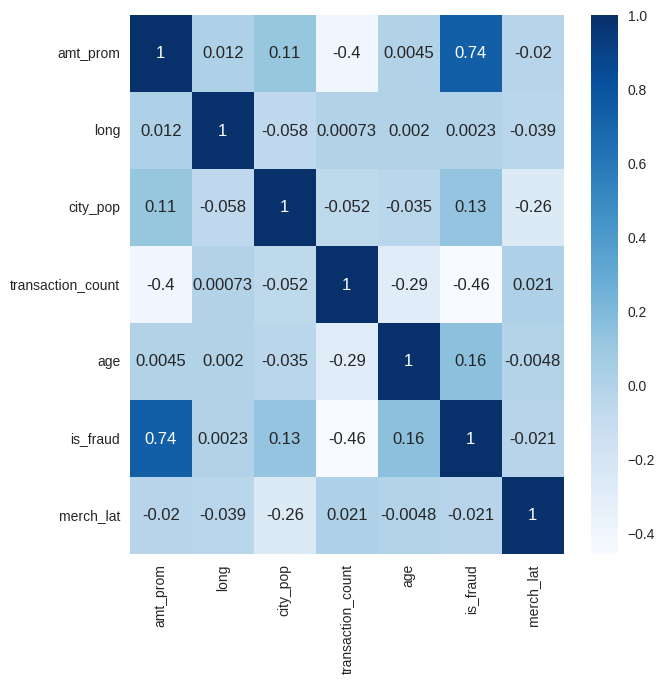

In [ ]:
corr_matrix = df[varc].corr()
plt.figure(figsize=(len(varc), len(varc)))
sns.heatmap(corr_matrix, cmap="Blues", annot=True)
plt.show

In [ ]:
df = df[varc + vard]

### Discretas

In [ ]:
for i in vard:
  df[i] = df[i].astype(str)

In [ ]:
freq(df, vard)

Frecuencias para la variable name 



,FA,FR,FAA,FRA
name,,,,
Zachary Boone,1,0.001028,1,0.001028
Aaron Murray,1,0.001028,2,0.002055
Aaron Pena,1,0.001028,3,0.003083
Aaron Rogers,1,0.001028,4,0.004111
Aaron Stewart,1,0.001028,5,0.005139
...,...,...,...,...
Alice Kemp,1,0.001028,969,0.995889
Alex White,1,0.001028,970,0.996917
Alex Singh,1,0.001028,971,0.997945




Frecuencias para la variable street 



,FA,FR,FAA,FRA
street,,,,
3703 Benson Wells,1,0.001028,1,0.001028
624 Hale Springs Apt. 572,1,0.001028,2,0.002055
793 Hooper Tunnel Suite 154,1,0.001028,3,0.003083
969 Huerta Path Apt. 270,1,0.001028,4,0.004111
400 Zuniga Pine,1,0.001028,5,0.005139
...,...,...,...,...
057 Martinez Radial,1,0.001028,969,0.995889
874 Fred Knolls Apt. 609,1,0.001028,970,0.996917
44417 Williams Manors,1,0.001028,971,0.997945




Frecuencias para la variable city 



,FA,FR,FAA,FRA
city,,,,
Dallas,5,0.005139,5,0.005139
Houston,4,0.004111,9,0.009250
New York City,4,0.004111,13,0.013361
Detroit,4,0.004111,17,0.017472
Huntsville,3,0.003083,20,0.020555
...,...,...,...,...
Clarks Mills,1,0.001028,969,0.995889
Center Tuftonboro,1,0.001028,970,0.996917
Plantersville,1,0.001028,971,0.997945




Frecuencias para la variable merchant 



,FA,FR,FAA,FRA
merchant,,,,
fraud_Kilback LLC,47,0.048304,47,0.048304
fraud_Cormier LLC,27,0.027749,74,0.076053
fraud_Boyer PLC,22,0.022610,96,0.098664
fraud_Dickinson Ltd,14,0.014388,110,0.113052
fraud_Bernhard Inc,13,0.013361,123,0.126413
...,...,...,...,...
"fraud_Watsica, Haag and Considine",1,0.001028,969,0.995889
fraud_Hudson-Grady,1,0.001028,970,0.996917
fraud_Shields-Wunsch,1,0.001028,971,0.997945




Frecuencias para la variable state 



,FA,FR,FAA,FRA
state,,,,
NY,71,0.072970,71,0.072970
TX,66,0.067831,137,0.140802
PA,58,0.059609,195,0.200411
CA,45,0.046249,240,0.246660
OH,39,0.040082,279,0.286742
FL,34,0.034943,313,0.321686
IL,33,0.033916,346,0.355601
MI,32,0.032888,378,0.388489
AL,28,0.028777,406,0.417266




Frecuencias para la variable job 



,FA,FR,FAA,FRA
job,,,,
Quantity surveyor,6,0.006166,6,0.006166
Naval architect,6,0.006166,12,0.012333
Materials engineer,6,0.006166,18,0.018499
Trading standards officer,6,0.006166,24,0.024666
"Copywriter, advertising",6,0.006166,30,0.030832
...,...,...,...,...
Barista,1,0.001028,969,0.995889
Music therapist,1,0.001028,970,0.996917
"Restaurant manager, fast food",1,0.001028,971,0.997945




Frecuencias para la variable category 



,FA,FR,FAA,FRA
category,,,,
gas_transport,460,0.472765,460,0.472765
grocery_pos,179,0.183967,639,0.656732
home,131,0.134635,770,0.791367
shopping_pos,124,0.127441,894,0.918808
shopping_net,34,0.034943,928,0.953751
kids_pets,30,0.030832,958,0.984584
misc_net,8,0.008222,966,0.992806
entertainment,4,0.004111,970,0.996917
food_dining,2,0.002055,972,0.998972




Frecuencias para la variable gender 



,FA,FR,FAA,FRA
gender,,,,
F,492,0.505653,492,0.505653
M,481,0.494347,973,1.000000




Frecuencias para la variable Fecha 



,FA,FR,FAA,FRA
Fecha,,,,
2019-12-01,65,0.066804,65,0.066804
2019-12-08,62,0.063720,127,0.130524
2019-12-09,55,0.056526,182,0.187050
2019-12-15,52,0.053443,234,0.240493
2019-12-22,43,0.044193,277,0.284687
...,...,...,...,...
2019-11-01,1,0.001028,969,0.995889
2020-05-31,1,0.001028,970,0.996917
2019-09-10,1,0.001028,971,0.997945




Frecuencias para la variable Hora 



,FA,FR,FAA,FRA
Hora,,,,
00:31:34,3,0.003083,3,0.003083
00:01:08,3,0.003083,6,0.006166
01:36:38,2,0.002055,8,0.008222
01:16:40,2,0.002055,10,0.010277
00:00:19,2,0.002055,12,0.012333
...,...,...,...,...
19:00:55,1,0.001028,969,0.995889
00:09:34,1,0.001028,970,0.996917
04:23:02,1,0.001028,971,0.997945


In [ ]:
#vemos si hay variables unarias
unarias = [v for v, conteo in zip(vard, [df[v].unique().shape[0] for v in vard]) if conteo == 1]
unarias

[]

In [ ]:
vard = [v for v in vard if v not in unarias]

In [ ]:
df_original = df.copy()

In [ ]:
df_original

,amt_prom,long,city_pop,transaction_count,age,is_fraud,merch_lat,name,street,city,merchant,state,job,category,gender,Fecha,Hora
0,99.745171,-93.3014,964.0,2050.0,45,0,39.174043,Aaron Murray,624 Hale Springs Apt. 572,Meadville,"fraud_Osinski, Ledner and Leuschke",MO,Tourist information centre manager,home,M,2019-12-21,01:09:34
1,66.377839,-77.2818,43102.0,1476.0,69,0,37.789455,Aaron Pena,793 Hooper Tunnel Suite 154,Burke,fraud_Bode-Rempel,VA,Health visitor,kids_pets,M,2019-05-06,00:28:39
2,75.627776,-100.6215,4005.0,508.0,74,0,41.807044,Aaron Rogers,969 Huerta Path Apt. 270,Valentine,fraud_Huels-Hahn,NE,Network engineer,gas_transport,M,2019-09-07,00:09:30
3,53.452626,-69.9576,6025.0,537.0,24,0,43.323929,Aaron Stewart,400 Zuniga Pine,Winthrop,fraud_Cartwright-Harris,ME,Advertising account planner,home,M,2020-01-15,00:01:32
4,63.935854,-86.9920,800.0,521.0,87,0,31.284435,Adam Keller,32600 Cobb Curve,Sardis,"fraud_Lockman, West and Runte",AL,Learning disability nurse,gas_transport,M,2019-04-12,00:02:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,65.178801,-74.1659,2258.0,2052.0,82,0,40.459589,William Thompson,977 Rita Grove Apt. 000,Rock Tavern,"fraud_Schaefer, Maggio and Daugherty",NY,Building surveyor,gas_transport,M,2019-12-02,00:45:33
969,60.704075,-92.5870,1758.0,1038.0,62,0,31.959292,Willie Jordan,529 West Key,Spearsville,fraud_Bernhard Inc,LA,"Psychologist, forensic",gas_transport,M,2019-12-01,00:40:14
970,99.746431,-83.5706,467.0,1516.0,35,0,36.105099,Xavier Beltran,61107 Edwards Dam Apt. 463,Big Creek,fraud_Auer-Mosciski,KY,"Psychologist, forensic",home,M,2019-12-13,02:28:53
971,62.865706,-92.1354,568.0,1523.0,50,0,41.455073,Zachary Allen,69252 Oconnor Alley Apt. 153,Ollie,"fraud_Crist, Jakubowski and Littel",IA,Commercial horticulturist,gas_transport,M,2019-12-09,01:46:17


#### Convertir discretas a continuas

In [ ]:
for v in ['city', 'merchant', 'state', 'job', 'category', 'gender', 'Fecha', 'Hora']:
    frec_dict = df[v].value_counts().to_dict()
    df[f'frec_{v}'] = df[v].map(frec_dict).fillna(0)

In [ ]:
var_frec = df.filter(like='frec').columns.tolist()
df = df[var_frec + varc]

In [ ]:
df[var_frec]

,frec_city,frec_merchant,frec_state,frec_job,frec_category,frec_gender,frec_Fecha,frec_Hora
0,2,3,28,2,131,481,21,1
1,1,3,25,2,30,481,1,1
2,1,3,19,2,460,481,2,1
3,1,8,12,3,131,481,1,1
4,1,5,28,2,460,481,1,2
...,...,...,...,...,...,...,...,...
968,1,3,71,4,460,481,42,1
969,1,13,14,3,460,481,65,1
970,1,7,22,3,131,481,2,1
971,1,2,22,4,460,481,55,1


#Normalización

Escalamos el conjunto ya que hay variables que provienen de distintas cosas y no tienen una escala en comun

In [ ]:
df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)

In [ ]:
df.columns

Index(['frec_city', 'frec_merchant', 'frec_state', 'frec_job', 'frec_category',
       'frec_gender', 'frec_Fecha', 'frec_Hora', 'amt_prom', 'long',
       'city_pop', 'transaction_count', 'age', 'is_fraud', 'merch_lat'],
      dtype='object')

#Reducción de Variables

##PCA

Text(0, 0.5, 'Varianza Explicada')

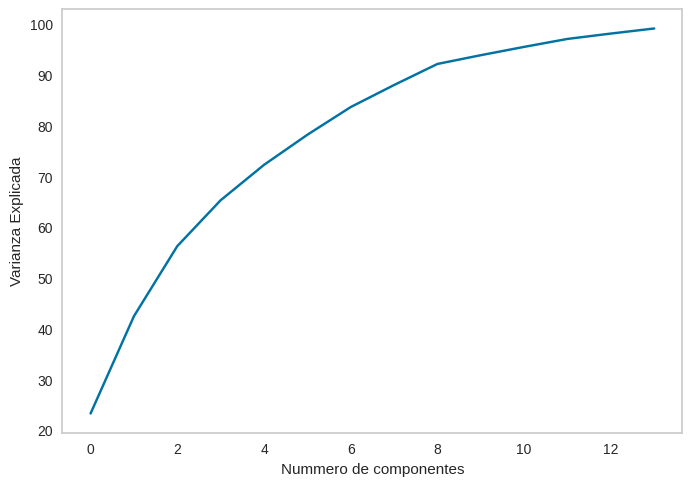

In [ ]:
pca_16 = PCA(n_components=14)
pca_16.fit(df)

plt.grid()
plt.plot(np.cumsum(pca_16.explained_variance_ratio_ * 100))
plt.xlabel('Nummero de componentes')
plt.ylabel('Varianza Explicada')

In [ ]:
varianza_explicada_acumulada = np.cumsum(pca_16.explained_variance_ratio_ * 100)
print(f'La varianza explicada correspondiente a usar 7 componentes es: {varianza_explicada_acumulada[7]}')

La varianza explicada correspondiente a usar 7 componentes es: 87.98052943430454


In [ ]:
pca_7 = PCA(n_components=7)
pca_7.fit(df)
df_pca_7 = pd.DataFrame(pca_7.transform(df), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

In [ ]:
pca_2 = PCA(n_components=2)
pca_2.fit(df)
df_pca_2 = pd.DataFrame(pca_2.transform(df), columns=['PC1', 'PC2'])

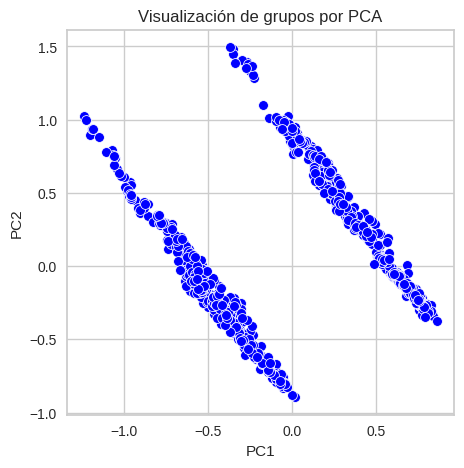

In [ ]:
plt.figure(figsize=(5,5))
sp = sns.scatterplot(x='PC1', y='PC2', s=50, data=df_pca_2, color='blue').set_title("Visualización de grupos por PCA")

##TSNE

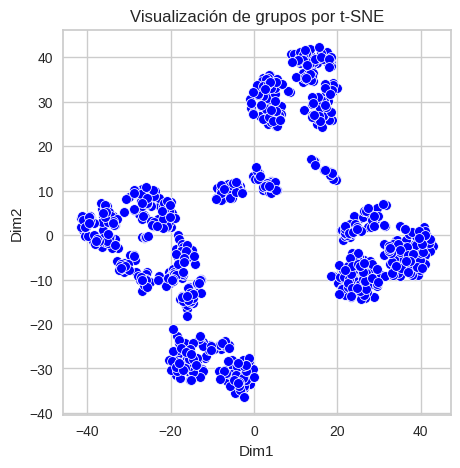

In [ ]:
tsne_2 = TSNE(n_components=2, random_state=42, perplexity=30)
df_tsne_2 = pd.DataFrame(tsne_2.fit_transform(df), columns=['Dim1', 'Dim2'])

plt.figure(figsize=(5, 5))
sns.scatterplot(x='Dim1', y='Dim2', s=50, data=df_tsne_2, color='blue').set_title("Visualización de grupos por t-SNE")
plt.show()

##KernePCA

In [ ]:
pca_2_kpca = KernelPCA(n_components=2, kernel='rbf')
pca_2_kpca.fit(df)
df_kpca_2 = pd.DataFrame(pca_2_kpca.transform(df), columns=['KPC1', 'KPC2'])

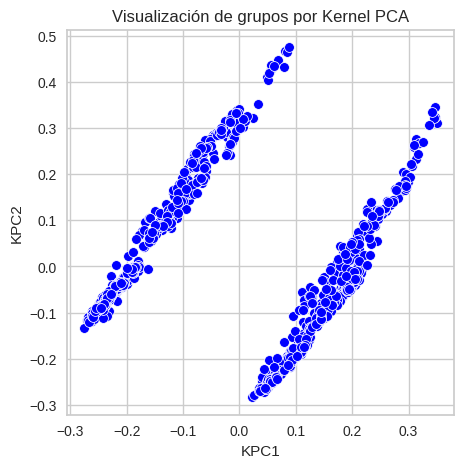

In [ ]:
plt.figure(figsize=(5,5))
sp = sns.scatterplot(x='KPC1', y='KPC2', s=50, data=df_kpca_2, color='blue').set_title("Visualización de grupos por Kernel PCA")

In [ ]:
print("Correlación de distancias con PCA:", distance_correlation(df, df_pca_2))
print("Correlación de distancias con Kernel PCA:", distance_correlation(df, df_kpca_2))
print("Correlación de distancias con t-SNE:", distance_correlation(df, df_tsne_2))

Correlación de distancias con PCA: 0.7384753176789536
Correlación de distancias con Kernel PCA: 0.7145674681764547
Correlación de distancias con t-SNE: 0.40799758826190863



Un valor más alto indica que el método mantiene mejor la estructura original de los datos, por lo que el método a usar para reducir dimensiones es usando PCA con 7 componentes y 2 para la visualización


#Número de Cluster Optimos

##CODO - KMeans

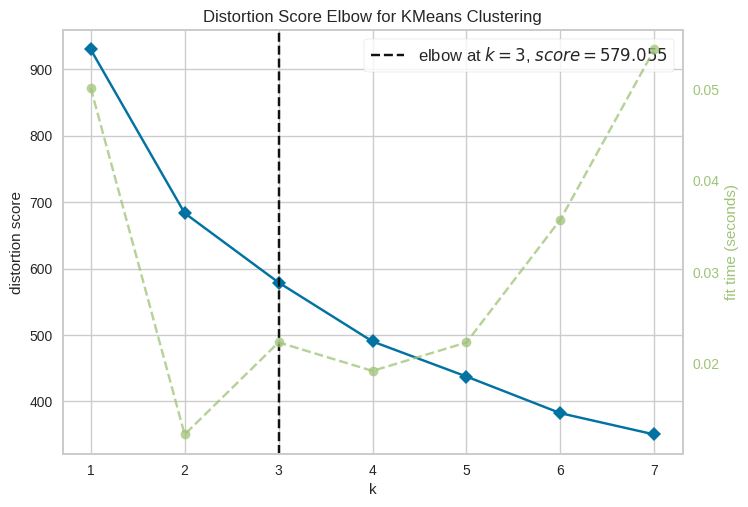

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(init='k-means++', max_iter=50, n_init=10)
visualizer = KElbowVisualizer(model, k=(1,8)).fit(df_pca_7)
visualizer.show()

**nos indica que el numero optimo seria 3**

## Silueta - K-MEANS & GMM

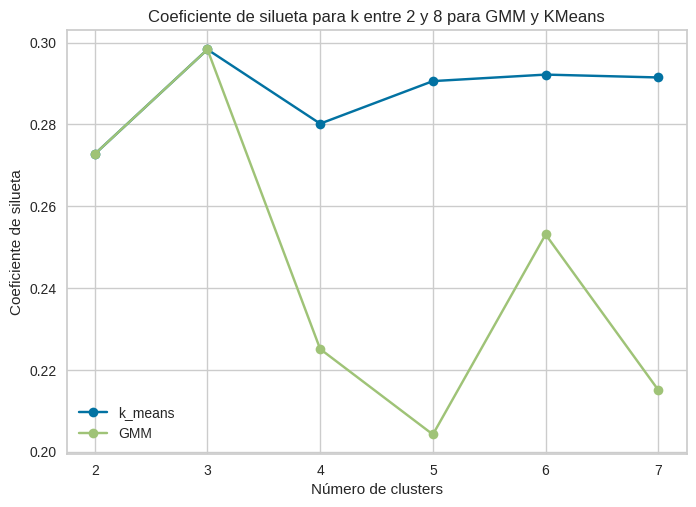

In [ ]:
silueta_kmeans = []
for k in list(range(2,8)):
    model = KMeans(n_clusters=k, init='k-means++', max_iter=50, n_init=10)
    model.fit(df_pca_7)
    labels = model.fit_predict(df_pca_7)
    score = silhouette_samples(df_pca_7, labels)
    score_avg = silhouette_score(df_pca_7, labels)
    silueta_kmeans.append(score_avg)

plt.plot(range(2,8), silueta_kmeans, 'bo-', label='k_means')

silueta_gmm = []
for k in list(range(2,8)):
    model = GMM(n_components=k, max_iter=100, n_init=10)
    model.fit(df_pca_7)
    labels = model.fit_predict(df_pca_7)
    score = silhouette_samples(df_pca_7, labels)
    score_avg = silhouette_score(df_pca_7, labels)
    silueta_gmm.append(score_avg)

plt.plot(range(2,8), silueta_gmm, 'go-', label='GMM')

plt.xlabel('Número de clusters')
plt.ylabel('Coeficiente de silueta')
plt.title('Coeficiente de silueta para k entre 2 y 8 para GMM y KMeans')
plt.legend()

**Observamos que Kmeans nos indica que el cluster optimo es 4 mientras que GMM nos indica que EL cluster optimo ES 2**

N Clusters : 2
Score Silueta : 0.23


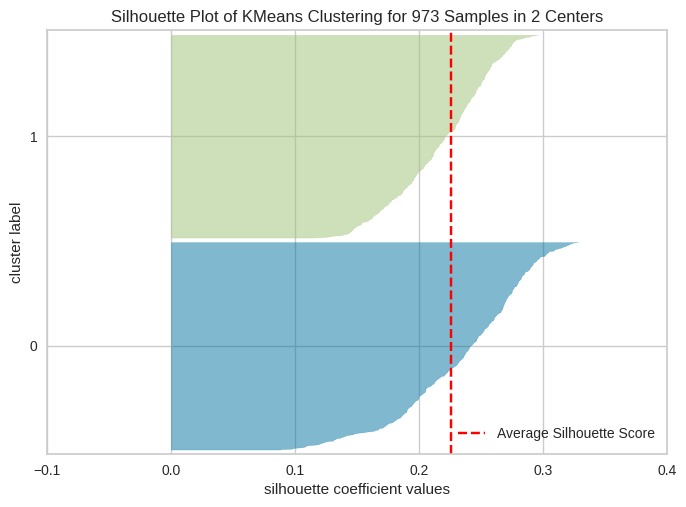

N Clusters : 3
Score Silueta : 0.25


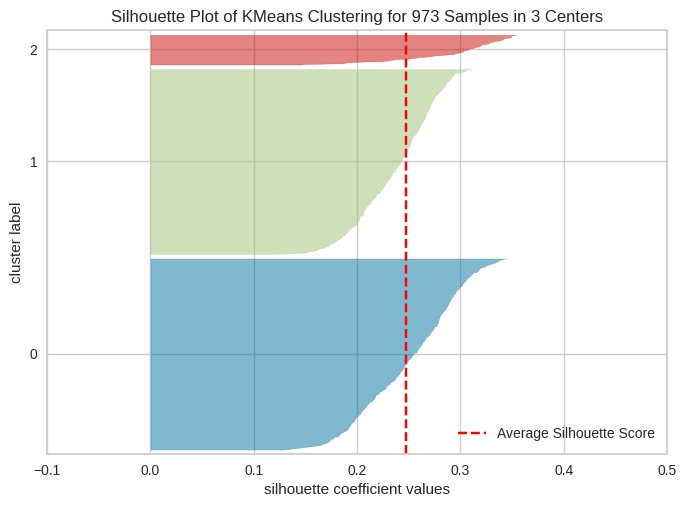

N Clusters : 4
Score Silueta : 0.24


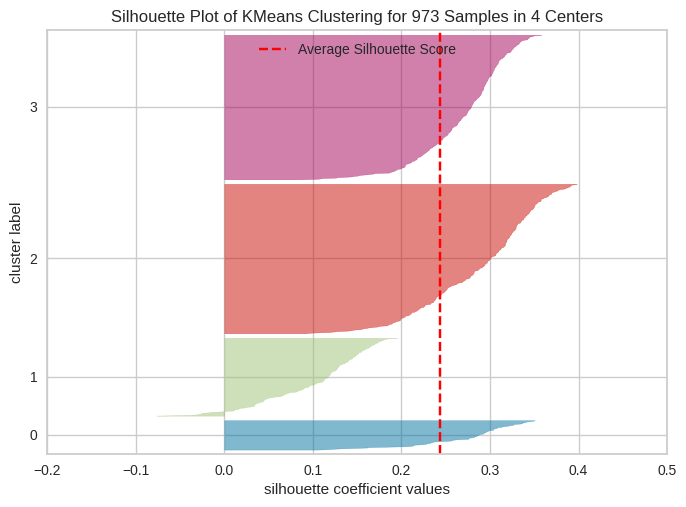

N Clusters : 5
Score Silueta : 0.24


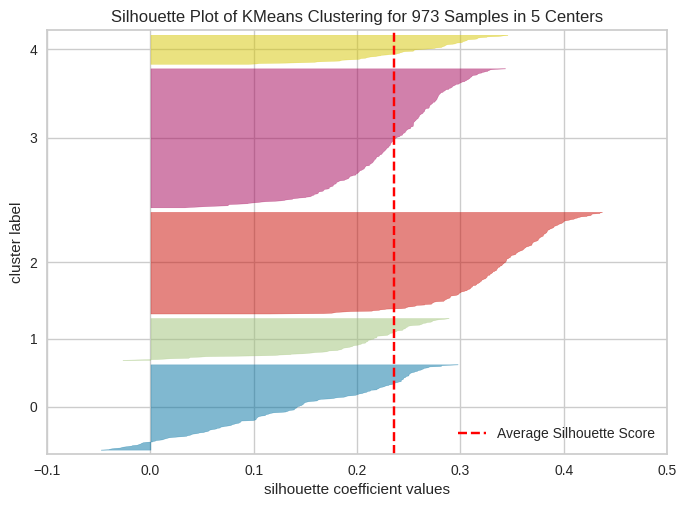

N Clusters : 6
Score Silueta : 0.18


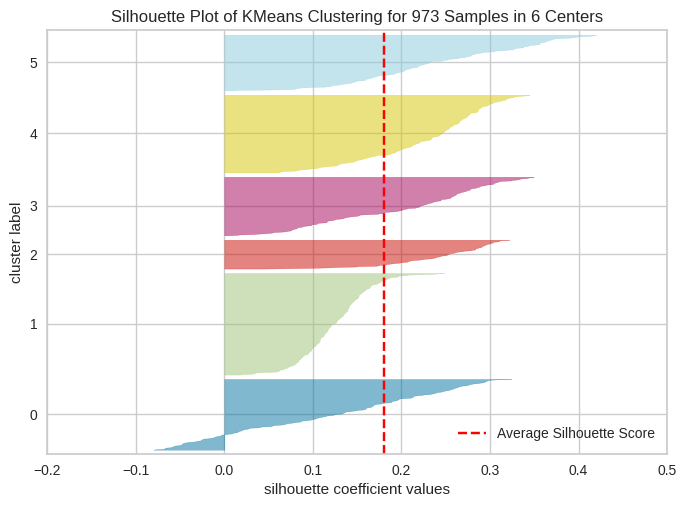

N Clusters : 7
Score Silueta : 0.22


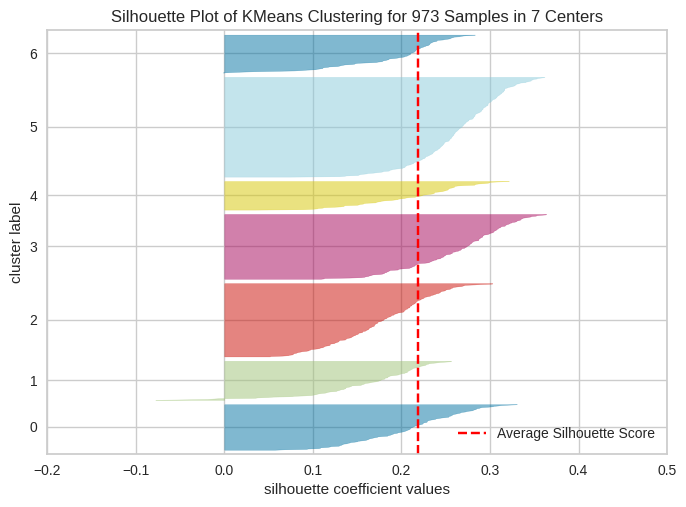

In [ ]:
for i in range(2,8):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=50, n_init=10)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
    visualizer.fit(df)
    print(f"N Clusters : {i}")
    print(f"Score Silueta : {round(visualizer.silhouette_score_,2)}")
    visualizer.show()

**Con la silueta vemos que el numero optimo de cluster es 2 o 3**
Prefiriendo el cluster 3 con score de silueta mayor con .25

## CALINSKI

GMM

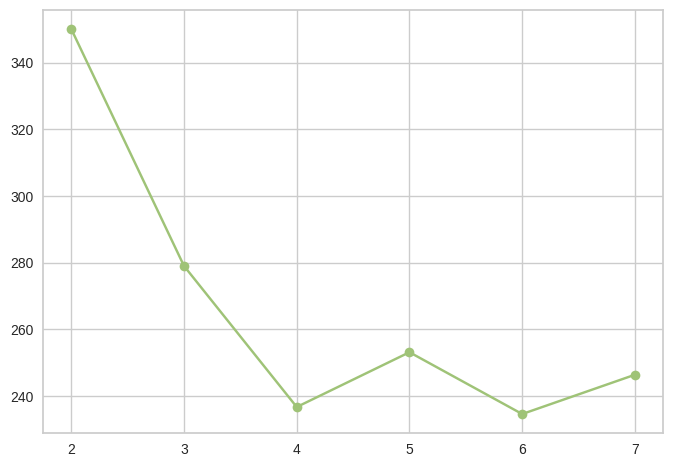

In [ ]:
calinski_gmm = []
for k in list(range(2, 8)):
    model = GMM(n_components=k, random_state=42)
    model.fit(df_pca_7)
    labels = model.fit_predict(df_pca_7)
    score = calinski_harabasz_score(df_pca_7,labels)
    calinski_gmm.append(score)

plt.plot(range(2,8), calinski_gmm, 'go-', label='GMM')

**Observamos para GMM usando CALINSKI el punto más alto es decir tienen una mejor separación para los grupos es el cluster 2**

KMEANS

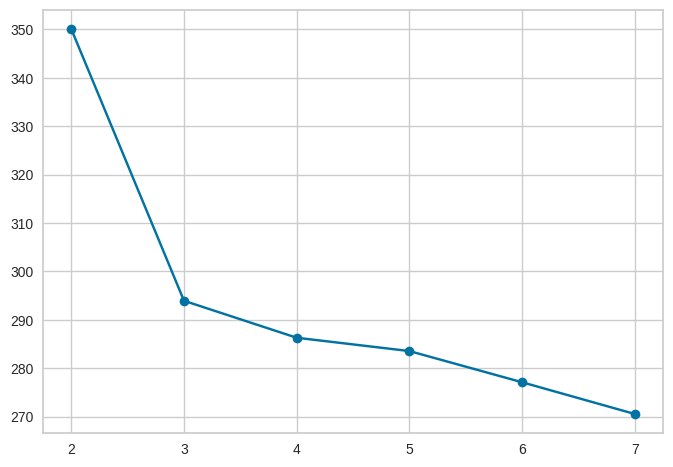

In [ ]:
calinski_kmeans = []
for k in list(range(2, 8)):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=50, n_init=10)
    km.fit(df_pca_7)
    labels = km.fit_predict(df_pca_7)
    score = calinski_harabasz_score(df_pca_7,labels)
    calinski_kmeans.append(score)

plt.plot(range(2,8), calinski_kmeans, 'bo-', label="k-means")

**Observamos para Kmeans usando CALINSKI el punto más alto esta en el cluster 2**

#Visualización de Grupos

**El cluster optimos esta entre 2 y 4**

**Iniciamos con 3 cluster**

### K MEANS

In [ ]:
k_means=KMeans(n_clusters=3, init='k-means++', max_iter=50, n_init=10,random_state=210)
k_means.fit(df_pca_7)
df_pca_2['cl_kmeans']=k_means.labels_

In [ ]:
score_avg = silhouette_score(df_pca_7, df_pca_2['cl_kmeans'])
print(f"Score Silueta : {round(score_avg,2)}")

Score Silueta : 0.25


In [ ]:
df_pca_2['cl_kmeans'].value_counts(1)

,proportion
cl_kmeans,
1,0.494347
2,0.262076
0,0.243577


In [ ]:
fig = px.scatter(df_pca_2, x='PC1', y='PC2', color='cl_kmeans',
                 color_continuous_scale='bluered',title = 'K-Means Clustering ',  template='plotly_dark').update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)', width=800, height=800)
fig

### DBSCAN

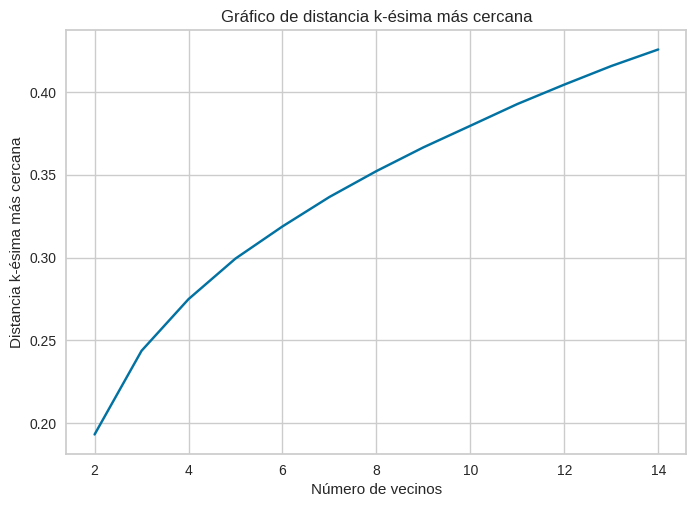

In [ ]:
n_neighbors = range(2, 15)
distances = []
for k in n_neighbors:
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(df_pca_7[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']])
    distances.append(np.mean(nbrs.kneighbors(df_pca_7[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']])[0][:, -1]))

plt.plot(n_neighbors, distances)
plt.xlabel('Número de vecinos')
plt.ylabel('Distancia k-ésima más cercana')
plt.title('Gráfico de distancia k-ésima más cercana')
plt.show()

In [ ]:
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(df_pca_7[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']])
distancias,_ = nbrs.kneighbors(df_pca_7[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']])
distancias = np.sort(distancias, axis=0)
distancias = distancias[:,1]
aux=pd.DataFrame()
aux["distancias"]=sorted(list(distancias),reverse=False)
aux["index"]=range(len(distancias))
fig = px.line(aux, x="index", y="distancias", title="Valor óptimo de Epsilon")
fig.show()

In [ ]:
dbscan=DBSCAN()
dbscan.fit(df_pca_7[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']])
dbscan_opt=DBSCAN(eps=0.42	,min_samples=10)
dbscan_opt.fit(df_pca_7[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']])
df_pca_2['cl_dbscan'] = dbscan_opt.labels_

In [ ]:
score_avg = silhouette_score(df_pca_7, df_pca_2['cl_dbscan'])
print(f"Score Silueta : {round(score_avg,2)}")

Score Silueta : 0.22


In [ ]:
df_pca_2['cl_dbscan'].value_counts()

,count
cl_dbscan,
3,245
0,181
2,156
-1,149
4,107
5,68
1,51
6,16


In [ ]:
fig2 = px.scatter(df_pca_2, x='PC1', y='PC2', color_continuous_scale='bluered',title = 'DBSCAN Clustering',
            color='cl_dbscan', template='plotly_dark').update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)', width=800, height=800)
fig2

### GMM

In [ ]:
gmm = GMM(n_components=3, init_params='random', max_iter=50, n_init=10, random_state=210)
gmm.fit(df_pca_7)
labels_gmm = gmm.predict(df_pca_7)
df_pca_7['cl_gmm'] = labels_gmm

In [ ]:
gmm = GMM(n_components=3,max_iter=50, random_state=210).fit(df_pca_7)
labels_gmm = gmm.predict(df_pca_7)
df_pca_2['cl_gmm'] = labels_gmm

In [ ]:
score_avg = silhouette_score(df_pca_7, df_pca_2['cl_gmm'])
print(f"Score Silueta : {round(score_avg,2)}")

Score Silueta : 0.31


In [ ]:
df_pca_2['cl_gmm'].value_counts(1)

,proportion
cl_gmm,
1,0.455293
0,0.303186
2,0.241521


In [ ]:
fig = px.scatter(df_pca_2, x='PC1', y='PC2', color='cl_gmm',
                 color_continuous_scale='bluered',title = 'GMM Clustering ', template='plotly_dark').update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)', width=800, height=800)
fig

**GMM es la mejor opción para este caso, ya que ofrece clusters más separados y con una estructura más clara según la métrica de silueta con 3 cluster obteniendo .27 en la metrica**

In [ ]:
df_pca_2

,PC1,PC2,cl_kmeans,cl_dbscan,cl_gmm
0,-0.522426,-0.153207,1,0,1
1,-0.787053,0.290186,1,1,1
2,-0.327011,-0.457010,1,2,1
3,-0.537796,-0.196095,1,0,1
4,-0.297058,-0.496511,1,2,1
...,...,...,...,...,...
968,-0.130676,-0.663927,1,-1,1
969,-0.072203,-0.802980,1,2,1
970,-0.583768,-0.102515,1,0,1
971,-0.072693,-0.782173,1,2,1


In [ ]:
df_pca_2.shape

(973, 5)

In [ ]:
df_original.shape # si coinciden los registros

(973, 17)

In [ ]:
df_original

,amt_prom,long,city_pop,transaction_count,age,is_fraud,merch_lat,name,street,city,merchant,state,job,category,gender,Fecha,Hora
0,99.745171,-93.3014,964.0,2050.0,45,0,39.174043,Aaron Murray,624 Hale Springs Apt. 572,Meadville,"fraud_Osinski, Ledner and Leuschke",MO,Tourist information centre manager,home,M,2019-12-21,01:09:34
1,66.377839,-77.2818,43102.0,1476.0,69,0,37.789455,Aaron Pena,793 Hooper Tunnel Suite 154,Burke,fraud_Bode-Rempel,VA,Health visitor,kids_pets,M,2019-05-06,00:28:39
2,75.627776,-100.6215,4005.0,508.0,74,0,41.807044,Aaron Rogers,969 Huerta Path Apt. 270,Valentine,fraud_Huels-Hahn,NE,Network engineer,gas_transport,M,2019-09-07,00:09:30
3,53.452626,-69.9576,6025.0,537.0,24,0,43.323929,Aaron Stewart,400 Zuniga Pine,Winthrop,fraud_Cartwright-Harris,ME,Advertising account planner,home,M,2020-01-15,00:01:32
4,63.935854,-86.9920,800.0,521.0,87,0,31.284435,Adam Keller,32600 Cobb Curve,Sardis,"fraud_Lockman, West and Runte",AL,Learning disability nurse,gas_transport,M,2019-04-12,00:02:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,65.178801,-74.1659,2258.0,2052.0,82,0,40.459589,William Thompson,977 Rita Grove Apt. 000,Rock Tavern,"fraud_Schaefer, Maggio and Daugherty",NY,Building surveyor,gas_transport,M,2019-12-02,00:45:33
969,60.704075,-92.5870,1758.0,1038.0,62,0,31.959292,Willie Jordan,529 West Key,Spearsville,fraud_Bernhard Inc,LA,"Psychologist, forensic",gas_transport,M,2019-12-01,00:40:14
970,99.746431,-83.5706,467.0,1516.0,35,0,36.105099,Xavier Beltran,61107 Edwards Dam Apt. 463,Big Creek,fraud_Auer-Mosciski,KY,"Psychologist, forensic",home,M,2019-12-13,02:28:53
971,62.865706,-92.1354,568.0,1523.0,50,0,41.455073,Zachary Allen,69252 Oconnor Alley Apt. 153,Ollie,"fraud_Crist, Jakubowski and Littel",IA,Commercial horticulturist,gas_transport,M,2019-12-09,01:46:17


In [ ]:
df_original['cluster'] = df_pca_2['cl_gmm']

#Perfilamiento

In [ ]:
df_original

,amt_prom,long,city_pop,transaction_count,age,is_fraud,merch_lat,name,street,city,merchant,state,job,category,gender,Fecha,Hora,cluster
0,99.745171,-93.3014,964.0,2050.0,45,0,39.174043,Aaron Murray,624 Hale Springs Apt. 572,Meadville,"fraud_Osinski, Ledner and Leuschke",MO,Tourist information centre manager,home,M,2019-12-21,01:09:34,1
1,66.377839,-77.2818,43102.0,1476.0,69,0,37.789455,Aaron Pena,793 Hooper Tunnel Suite 154,Burke,fraud_Bode-Rempel,VA,Health visitor,kids_pets,M,2019-05-06,00:28:39,1
2,75.627776,-100.6215,4005.0,508.0,74,0,41.807044,Aaron Rogers,969 Huerta Path Apt. 270,Valentine,fraud_Huels-Hahn,NE,Network engineer,gas_transport,M,2019-09-07,00:09:30,1
3,53.452626,-69.9576,6025.0,537.0,24,0,43.323929,Aaron Stewart,400 Zuniga Pine,Winthrop,fraud_Cartwright-Harris,ME,Advertising account planner,home,M,2020-01-15,00:01:32,1
4,63.935854,-86.9920,800.0,521.0,87,0,31.284435,Adam Keller,32600 Cobb Curve,Sardis,"fraud_Lockman, West and Runte",AL,Learning disability nurse,gas_transport,M,2019-04-12,00:02:25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,65.178801,-74.1659,2258.0,2052.0,82,0,40.459589,William Thompson,977 Rita Grove Apt. 000,Rock Tavern,"fraud_Schaefer, Maggio and Daugherty",NY,Building surveyor,gas_transport,M,2019-12-02,00:45:33,1
969,60.704075,-92.5870,1758.0,1038.0,62,0,31.959292,Willie Jordan,529 West Key,Spearsville,fraud_Bernhard Inc,LA,"Psychologist, forensic",gas_transport,M,2019-12-01,00:40:14,1
970,99.746431,-83.5706,467.0,1516.0,35,0,36.105099,Xavier Beltran,61107 Edwards Dam Apt. 463,Big Creek,fraud_Auer-Mosciski,KY,"Psychologist, forensic",home,M,2019-12-13,02:28:53,1
971,62.865706,-92.1354,568.0,1523.0,50,0,41.455073,Zachary Allen,69252 Oconnor Alley Apt. 153,Ollie,"fraud_Crist, Jakubowski and Littel",IA,Commercial horticulturist,gas_transport,M,2019-12-09,01:46:17,1


In [ ]:
df_original['cluster'].value_counts()

,count
cluster,
1,443
0,295
2,235


In [ ]:
df_original.columns

Index(['amt_prom', 'long', 'city_pop', 'transaction_count', 'age', 'is_fraud',
       'merch_lat', 'name', 'street', 'city', 'merchant', 'state', 'job',
       'category', 'gender', 'Fecha', 'Hora', 'cluster'],
      dtype='object')

In [ ]:
fig = px.box(df_original, x='cluster', y='amt_prom', title='Distribución del gasto promedio por cluster')
fig.show()

In [ ]:
df_trans = df_original.groupby('cluster')['transaction_count'].sum().reset_index()
df_trans['cluster'] = df_trans['cluster'].astype(str)
fig = px.bar(df_trans, x='cluster', y='transaction_count', color='cluster',
             title='Total de transacciones por cluster',
             labels={'transaction_count': 'Cantidad total de transacciones', 'cluster': 'Cluster'},
             color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

In [ ]:
df_age = df_original.groupby('cluster')['age'].mean().reset_index()
df_age['cluster'] = df_age['cluster'].astype(str)
fig = px.bar(df_age, x='cluster', y='age', color='cluster',
             title='Edad promedio por cluster',
             labels={'age': 'Edad promedio', 'cluster': 'Cluster'},
             color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

In [ ]:
color_map = {cluster: px.colors.qualitative.Set1[i] for i, cluster in enumerate(df_original['cluster'].unique())}
for cluster_id in df_original['cluster'].unique():
    df_cluster = df_original[df_original['cluster'] == cluster_id]

    fig = px.histogram(df_cluster, x='age', nbins=20,
                       title=f'Distribución de edad en Cluster {cluster_id}',
                       labels={'age': 'Edad'},
                       opacity=0.75,
                       color_discrete_sequence=[color_map[cluster_id]])
    fig.show()

In [ ]:
# Agrupamos los nombres por cluster y los mostramos en una lista
df_names = df_original.groupby('cluster')['name'].unique().reset_index()
df_names

,cluster,name
0,0,"[Alex Singh, Alice Kemp, Alicia Bishop, Alicia..."
1,1,"[Aaron Murray, Aaron Pena, Aaron Rogers, Aaron..."
2,2,"[Adriana Harvey, Alicia Hawkins, Alicia Miller..."


In [ ]:
df_name = df_original.groupby('cluster')['name'].nunique().reset_index()
df_name['cluster'] = df_name['cluster'].astype(str)
fig = px.bar(df_name, x='cluster', y='name', color='cluster',
             title='Número de titulares únicos por cluster',
             labels={'name': 'Cantidad de titulares', 'cluster': 'Cluster'},
             color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

In [ ]:
fig = px.pie(df_name, names='cluster', values='name',
             title='Proporción de titulares únicos por cluster',
             labels={'name': 'Cantidad de titulares', 'cluster': 'Cluster'},
             color='cluster',
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.show()

In [ ]:
# Contamos la cantidad de transacciones fraudulentas y no fraudulentas por cluster
df_fraud_count = df_original.groupby(['cluster', 'is_fraud']).size().reset_index(name='count')
fig = px.bar(df_fraud_count, x='cluster', y='count', color='is_fraud',
             title='Distribución de transacciones fraudulentas por cluster',
             labels={'count': 'Cantidad de transacciones', 'cluster': 'Cluster', 'is_fraud': 'Fraude'},
             barmode='stack',
             color_discrete_map={0: 'blue', 1: 'red'})
fig.show()

In [ ]:
fig = px.scatter(df_original, x='transaction_count', y='amt_prom', color='cluster', title='Relación entre Transacciones y Gasto Promedio')
fig.show()

Los puntos amarillos (Cluster 2) tienden a estar más presentes en valores más altos de gasto promedio (amt_prom)
Los puntos azules (Cluster 0) y rosados (Cluster 1) están más distribuidos en valores más bajos de amt_prom, con menor dispersión representando un menor gasto

In [ ]:
# Contamos la cantidad de transacciones por categoría y cluster
df_category_count = df_original.groupby(['cluster', 'category']).size().reset_index(name='count')
fig = px.treemap(df_category_count, path=['cluster', 'category'], values='count',
                 title='Distribución de categorías en cada cluster',
                 labels={'count': 'Número de transacciones', 'cluster': 'Cluster', 'category': 'Categoría'},
                 color='count', color_continuous_scale='viridis')

fig.show()

In [ ]:
# Contamos la cantidad de hombres y mujeres por cluster
df_gender_count = df_original.groupby(['cluster', 'gender']).size().reset_index(name='count')
fig = px.bar(df_gender_count, x='cluster', y='count', color='gender',
             title='Distribución de género por cluster',
             labels={'count': 'Cantidad de personas', 'cluster': 'Cluster', 'gender': 'Género'},
             barmode='stack',
             color_discrete_map={'M': 'blue', 'F': 'pink'})

fig.show()

In [ ]:
color_map = {cluster: px.colors.qualitative.Set1[i] for i, cluster in enumerate(df_original['cluster'].unique())}
for cluster_id in df_original['cluster'].unique():
    df_cluster = df_original[df_original['cluster'] == cluster_id]

    fig = px.histogram(df_cluster, x='state', nbins=20,
                       title=f'Distribución de state en Cluster {cluster_id}',
                       labels={'state': 'state'},
                       opacity=0.75,
                       color_discrete_sequence=[color_map[cluster_id]])
    fig.show()

In [ ]:
df_original['Fecha'] = pd.to_datetime(df_original['Fecha'])
df_grouped = df_original.groupby(['Fecha', 'cluster']).size().reset_index(name='Transacciones')
fig = px.line(df_grouped, x='Fecha', y='Transacciones', color='cluster',
              markers=True, title='Transacciones por Fecha y Cluster')
fig.update_xaxes(title='Fecha', tickangle=-45)
fig.update_yaxes(title='Cantidad de Transacciones')
fig.show()

In [ ]:
import pickle
import os
import pandas as pd
# Importa tus modelos y preprocesadores si no están en el mismo script
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
# Importa tus modelos y preprocesadores si no están en el mismo script
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# --- Simulación de carga de datos y entrenamiento para demostración ---
# En tu notebook real, estas variables ya existen después de entrenar
# Solo se incluyen aquí para que el código sea ejecutable de forma independiente

# Datos de ejemplo para simular transacciones
data_clustering = {
    'Amount': np.random.rand(100) * 1000,
    'Category': np.random.choice(['groceries', 'travel', 'entertainment', 'utilities'], 100),
    'Gender': np.random.choice(['M', 'F'], 100),
    'State': np.random.choice(['NY', 'CA', 'TX', 'FL'], 100)
}
df_clustering = pd.DataFrame(data_clustering)

# Simular LabelEncoder
le_gender = LabelEncoder()
df_clustering['Gender_Encoded'] = le_gender.fit_transform(df_clustering['Gender'])

# Simular OneHotEncoder
ohe_category = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe_state = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

category_encoded = ohe_category.fit_transform(df_clustering[['Category']])
state_encoded = ohe_state.fit_transform(df_clustering[['State']])

category_df = pd.DataFrame(category_encoded, columns=ohe_category.get_feature_names_out(['Category']))
state_df = pd.DataFrame(state_encoded, columns=ohe_state.get_feature_names_out(['State']))

# Concatenar características numéricas y codificadas
X_clustering_pre_scale = pd.concat([df_clustering[['Amount', 'Gender_Encoded']], category_df, state_df], axis=1)

# Entrenar StandardScaler para clustering
scaler_clustering = StandardScaler()
X_clustering_scaled = scaler_clustering.fit_transform(X_clustering_pre_scale)

# Entrenar KMeans
kmeans_model = KMeans(n_clusters=4, random_state=42, n_init=10) # Asumiendo 4 clusters
kmeans_model.fit(X_clustering_scaled)

# Nombres de las características utilizadas para el clustering
features_for_clustering = X_clustering_pre_scale.columns.tolist()

# --- Fin de la simulación ---

# Directorio donde se guardarán los modelos (ya creado por el script anterior)
models_dir = '/content/drive/MyDrive/PROYECTO DIMPLADO/kmeans_cluster_model'

# 1. Guardar el modelo KMeans
with open(os.path.join(models_dir, 'kmeans_cluster_model.pkl'), 'wb') as f:
    pickle.dump(kmeans_model, f)
print(f"Modelo KMeans guardado en: {os.path.join(models_dir, 'kmeans_cluster_model.pkl')}")

# 2. Guardar el StandardScaler para el modelo de clustering
with open(os.path.join(models_dir, 'scaler_clustering.pkl'), 'wb') as f:
    pickle.dump(scaler_clustering, f)
print(f"StandardScaler de clustering guardado en: {os.path.join(models_dir, 'scaler_clustering.pkl')}")

# 3. Guardar los LabelEncoders (si aplicable, por ejemplo, para 'Gender')
# Asegúrate de guardar cada LabelEncoder que hayas usado.
# En este ejemplo, solo 'Gender' fue codificado con LabelEncoder.
with open(os.path.join(models_dir, 'le_gender.pkl'), 'wb') as f:
    pickle.dump(le_gender, f)
print(f"LabelEncoder para 'Gender' guardado en: {os.path.join(models_dir, 'le_gender.pkl')}")

# 4. Guardar los OneHotEncoders (si aplicable, por ejemplo, para 'Category' y 'State')
# Asegúrate de guardar cada OneHotEncoder que hayas usado.
with open(os.path.join(models_dir, 'ohe_category.pkl'), 'wb') as f:
    pickle.dump(ohe_category, f)
print(f"OneHotEncoder para 'Category' guardado en: {os.path.join(models_dir, 'ohe_category.pkl')}")

with open(os.path.join(models_dir, 'ohe_state.pkl'), 'wb') as f:
    pickle.dump(ohe_state, f)
print(f"OneHotEncoder para 'State' guardado en: {os.path.join(models_dir, 'ohe_state.pkl')}")


# 5. Guardar los nombres de las características finales para clustering (muy recomendado)
with open(os.path.join(models_dir, 'features_for_clustering.pkl'), 'wb') as f:
    pickle.dump(features_for_clustering, f)
print(f"Nombres de características para clustering guardados en: {os.path.join(models_dir, 'features_for_clustering.pkl')}")

print("\nTodos los elementos para el modelo de segmentación de clientes han sido guardados.")

Modelo KMeans guardado en: /content/drive/MyDrive/PROYECTO DIMPLADO/kmeans_cluster_model/kmeans_cluster_model.pkl
StandardScaler de clustering guardado en: /content/drive/MyDrive/PROYECTO DIMPLADO/kmeans_cluster_model/scaler_clustering.pkl
LabelEncoder para 'Gender' guardado en: /content/drive/MyDrive/PROYECTO DIMPLADO/kmeans_cluster_model/le_gender.pkl
OneHotEncoder para 'Category' guardado en: /content/drive/MyDrive/PROYECTO DIMPLADO/kmeans_cluster_model/ohe_category.pkl
OneHotEncoder para 'State' guardado en: /content/drive/MyDrive/PROYECTO DIMPLADO/kmeans_cluster_model/ohe_state.pkl
Nombres de características para clustering guardados en: /content/drive/MyDrive/PROYECTO DIMPLADO/kmeans_cluster_model/features_for_clustering.pkl

Todos los elementos para el modelo de segmentación de clientes han sido guardados.


## Cluster 0 - **Usuarios Regulares**

+ Gasto promedio intermedio: mayor que el Cluster 1 pero menor que el Cluster 2.
+ Realizan transacciones de menor monto.
+ Total de 279.12k transacciones en el período 2019-2020.
+ Compuesto por 216 titulares (22.2% del total).
+ Edad promedio: 47 años. Los más activos tienen entre 30-34 y 45-49 años, mientras que los menos activos están entre 15-19 y 90-94 años.
+ Equilibrio de género: 53% masculino, 47% femenino.
+ Bajo nivel de fraude: solo 25 transacciones fraudulentas (11%).
+ Principales gastos:

Comestibles (54 transacciones).

Compras (53 transacciones).

Menos transacciones en entretenimiento (1 transacción).

+  El lugar en el que se realizan la mayor parte de transacciones, son California, New York, Texas
* Se registró el mayor número de transacciones los días **1 y 8 de diciembre de 2019**, con un total de **11 transacciones** en ambas fechas.


Estrategias para crédito y tarjetas:

📌 Tarjeta de recompensas en supermercados y retail: Ofrecer descuentos o cashback en compras y comestibles por volumen.

📌 Créditos a corto plazo con bajas tasas: Dirigido a usuarios con historial de compras recurrentes.

📌 Promociones en entretenimiento: Incentivar mayor gasto en categorías poco utilizadas.

## Cluster 1 - **Usuarios Frecuentes**

+ Menor gasto promedio en comparación con los otros clusters.
+ Mayor número de transacciones: 580.053k transacciones en el período analizado.
+ Compuesto por 382 titulares (39.3% del total).
+ Edad promedio: 50 años.
+ Los más activos tienen entre 45-49 años, mientras que los menos activos están entre 15-19 años.
+ Exclusivamente género femenino.
+ Nivel bajo de fraude: 22 transacciones fraudulentas (6%).
+ Principales gastos:

Transporte (249 transacciones).

Compras (64 transacciones).

Menos transacciones en comidas de comedor (2 transacciones).

+ El lugar en el que se realizan la mayor parte de transacciones, son  Pensilvania, Texas, New York

* La actividad fue más alta los días **1 y 9 de diciembre de 2019**, con **28 y 31 transacciones**, respectivamente, siendo el **9 de diciembre** el día con más transacciones dentro de este cluster.

Estrategias para crédito y tarjetas:

📌 Tarjeta de transporte con beneficios exclusivos: Descuentos o bonificaciones en movilidad.

📌 Línea de crédito con enfoque en compras y retail: Incentivar compras con cuotas sin interés.

📌 Suscripciones y membresías: Programas de descuentos exclusivos para viajeras constantes.

## Cluster 2 - **Usuarios Premium**

+ Mayor gasto promedio en comparación con los otros clusters.
+ Total de 457.167k transacciones en el período analizado.
+ Compuesto por 375 titulares (38.5% del total).
+ Edad promedio: 49 años.
+ Los más activos tienen entre 50-54 años, mientras que los menos activos están entre 10-14 y 95-99 años.
+ Exclusivamente género masculino.
+ Nivel moderado de fraude: 25 transacciones fraudulentas (7%).
+ Principales gastos:

Transporte (167 transacciones).

Comestibles (92 transacciones).

Menos transacciones en cuidado personal y entretenimiento (1 transacción cada uno).
+  El lugar en el que se realizan la mayor parte de transacciones, son  Pennsylvania, New York , Texas
* Las fechas con mayor cantidad de transacciones fueron **1 y 8 de diciembre de 2019**, con 26 transacciones el día 1 y 24 transacciones el día 8

Estrategias para crédito y tarjetas:

📌 Tarjeta premium con beneficios en viajes y transporte: Descuentos en aerolíneas.

📌 Créditos de alto monto y tasas preferenciales: Enfocados en clientes con historial de gasto elevado.

📌 Programas de lealtad y exclusividad: Acceso a eventos, membresías y experiencias de lujo.